# Food Order Prediction

First import packages and datasets. Do data pre-processing and than data visualization for understanding our dataset.
Next step is model building but before model building we have to do feature selections for our model's better performance and lastly make Prediction on our test data.

Import the packages & datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
food_train = pd.read_csv("food_train.csv")
food_test = pd.read_csv("food_test.csv")
food_meali = pd.read_csv("food_meal_info.csv")
food_fci = pd.read_csv("food_fulfilment_center_info.csv")

Check heads and tails for all the datasets

In [3]:
food_train.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [4]:
food_meali.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [5]:
food_fci.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [6]:
food_test.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

 We can join 3 dataset with below criteria
 
food_train['meal_id'] = food_meali['meal_id']

food_train['center_id'] = food_fci['center_id']


The resulting DataFrame, food_train1, will contain all the rows from food_train and only the matching rows from food_meali & food_fci. If there's no match in food_meali & food_fci for a row in food_train1, the columns from food_meali & food_fci will contain NaN (missing) values in the resulting DataFrame.

In [7]:
# Merge the DataFrames 
food_train1 = food_train.merge(food_meali, on='meal_id', how='left') 
food_train1 = food_train1.merge(food_fci, on='center_id', how='left')
food_test1 = food_test.merge(food_meali, on='meal_id', how='left') 
food_test1 = food_test1.merge(food_fci, on='center_id', how='left')
food_train1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [8]:
food_test1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured   category cuisine  city_code  \
0                      0                  0  Beverages    Thai        647   
1                      0                  0  Beverages    Thai        647   
2                      0                  0  Beverages    Thai        647   
3                      0                  0  Beverages  Indian        647   
4                      0                  0  Beverages  Indian        647   

   region_code center_type  op_area  
0           56      TYPE_C      2.0  
1           56      TYPE_C      2.0  
2           56      TYPE_C      2.0  
3           56      TYPE_C      2.0  
4           56      TYPE_C      2.0

In [9]:
food_train1.shape

(456548, 15)

In [10]:
food_test1.shape

(32573, 14)

Check Null Values

In [11]:
food_train1.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [12]:
food_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [13]:
food_train1.week.value_counts()

week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64

## Data Visualization

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

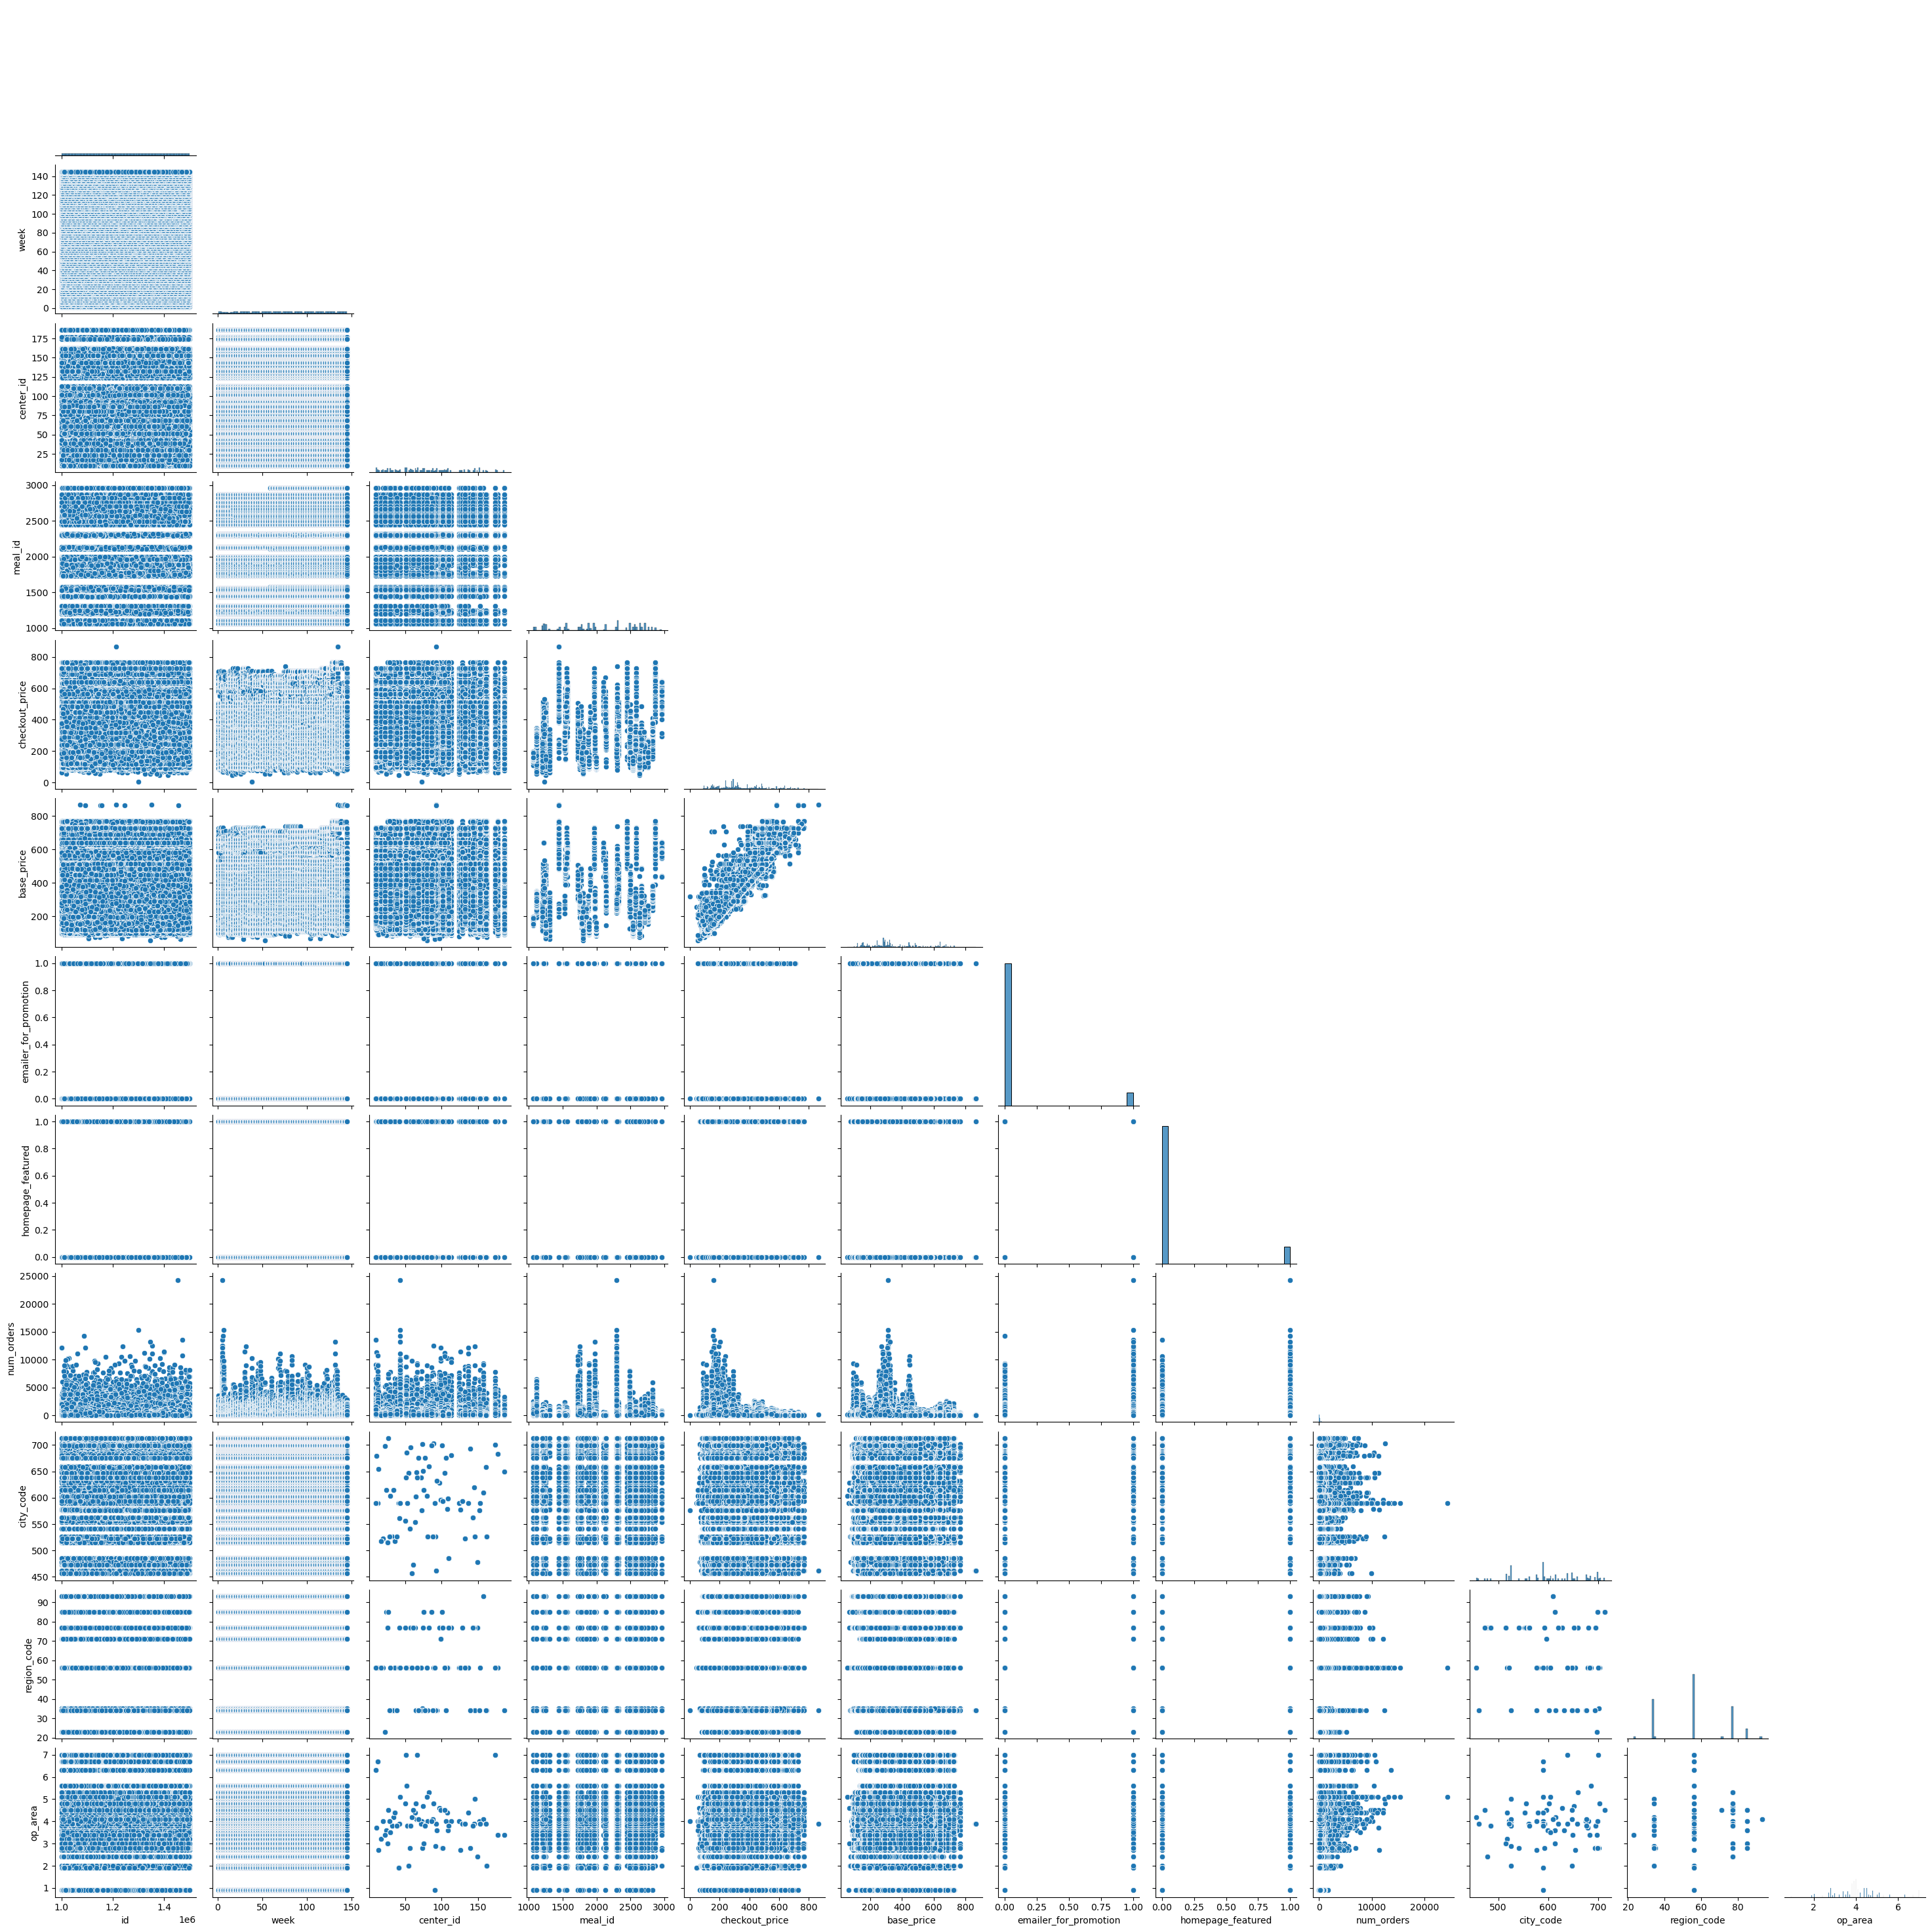

In [15]:
sns.pairplot(food_train1,corner=True)
plt.show()

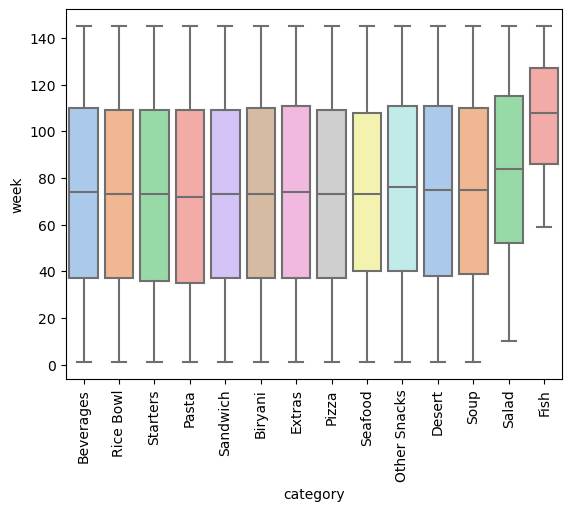

In [16]:
sns.set_palette('pastel')
sns.boxplot(data=food_train1, x="category", y="week",palette='pastel')
plt.xticks(rotation=90)
plt.show()

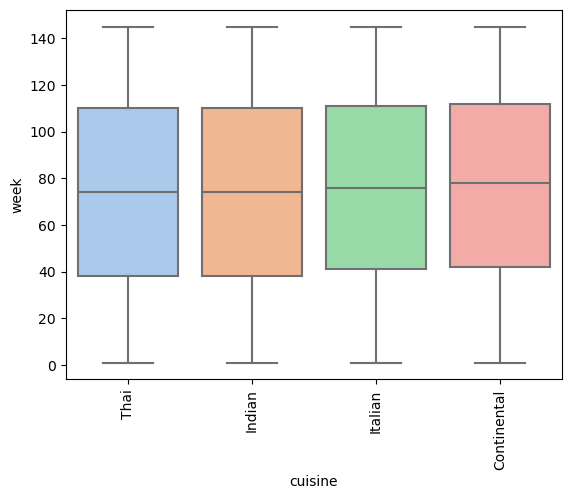

In [17]:
sns.set_palette('pastel')
sns.boxplot(data=food_train1, x="cuisine", y="week",palette='pastel')
plt.xticks(rotation=90)
plt.show()

In [18]:
food_train1.center_id.value_counts()

center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

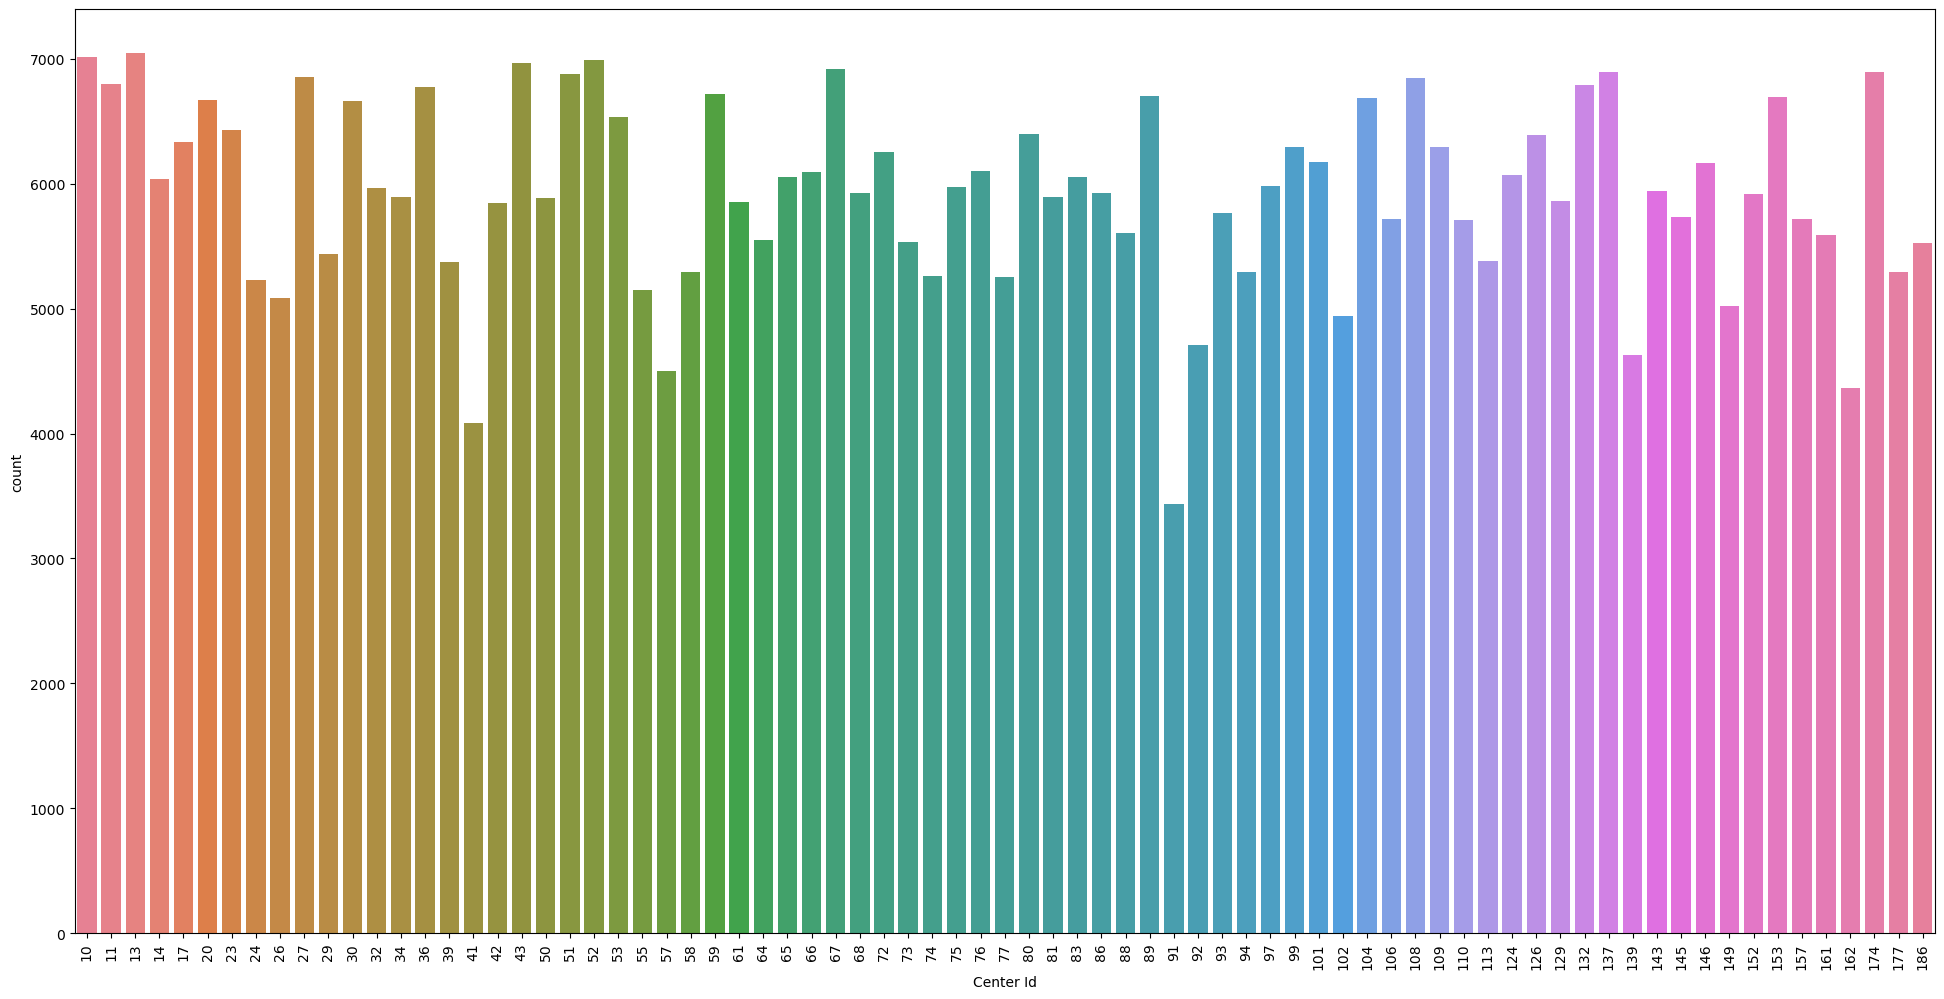

In [19]:
# sns.set_palette('pastel')
plt.figure(figsize=(24, 12)) 
sns.countplot(data=food_train1, x="center_id",palette='husl')
plt.xticks(rotation=90)
plt.xlabel("Center Id")
plt.show()

In [15]:
# Calculate the counts of each cuisine
import plotly.express as px
cuisine_counts = food_train1['cuisine'].value_counts()
fig = px.pie(values=cuisine_counts, names=cuisine_counts.index)
fig.show()

In [16]:
fig = px.pie(values=food_train1['center_type'].value_counts(), names=food_train1['center_type'].unique())
fig.show()

In [17]:
fig = px.pie(values=food_train1['category'].value_counts(), names=food_train1['category'].unique())
fig.show()

In [23]:
food_train1.meal_id.value_counts()

meal_id
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445     9727
2126     9705
1216     9695
2304     9676
2569     9459
2492     9382
1525     9359
2490     9247
2444     9097
2139     8899
2577     8667
2306     8294
2867     8092
1247     7184
1902     6748
1770     6682
1311     4682
1803     4674
1571     4511
1438     4385
1198     4206
2494     4206
1847     4084
2956     3319
2104     2357
Name: count, dtype: int64

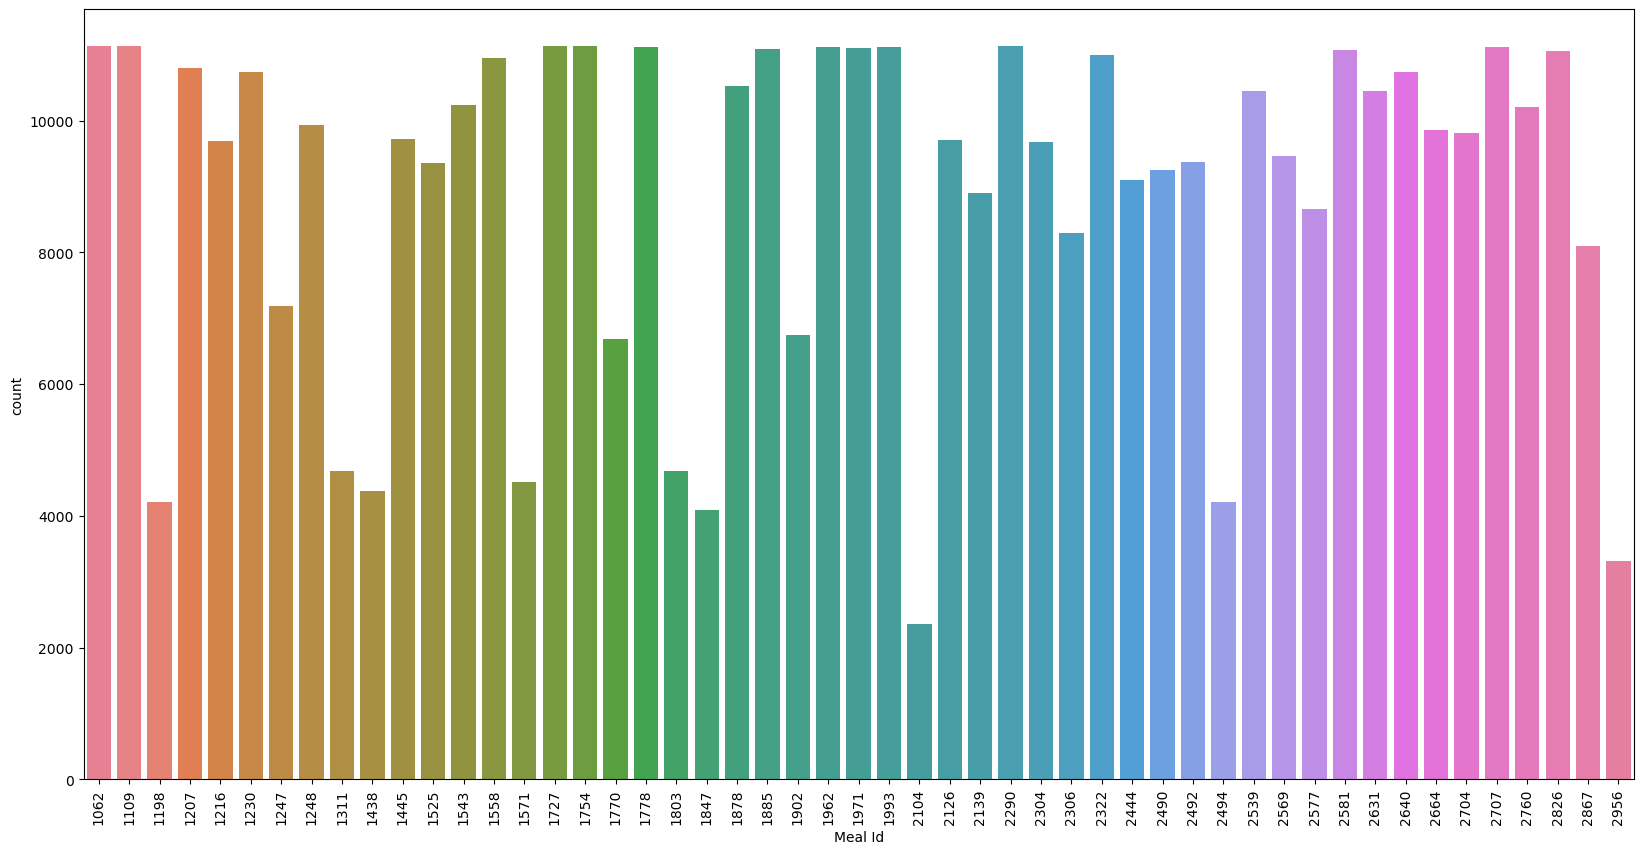

In [24]:
plt.figure(figsize=(20, 10)) 
sns.countplot(data=food_train1, x="meal_id",palette='husl')
plt.xticks(rotation=90)
plt.xlabel("Meal Id")
plt.show()

In [25]:
food_train1.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

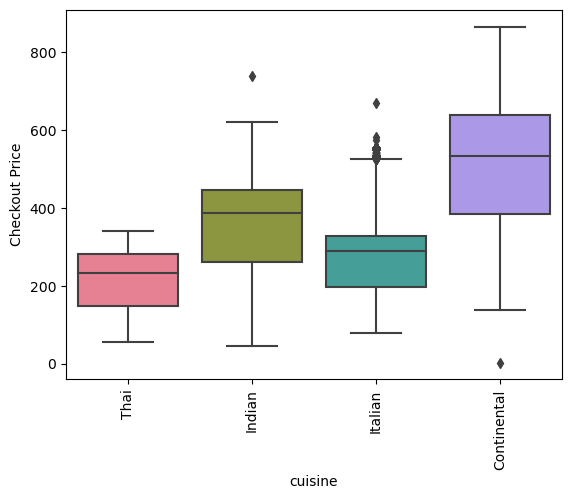

In [26]:
# sns.set_palette('pastel')
sns.boxplot(data=food_train1, x="cuisine", y="checkout_price",palette='husl')
plt.ylabel("Checkout Price")
plt.xticks(rotation=90)
plt.show()

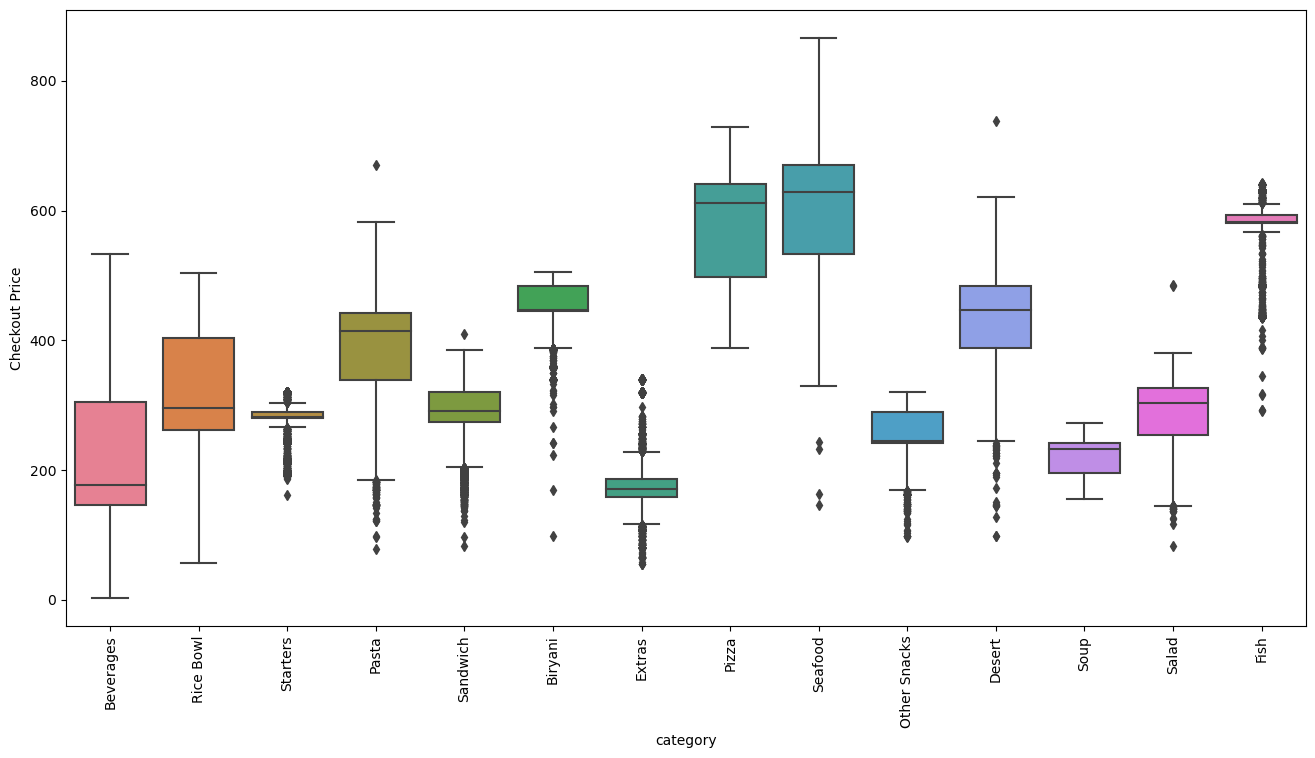

In [27]:
plt.figure(figsize=(16, 8)) 
sns.boxplot(data=food_train1, x="category", y="checkout_price",palette='husl')
plt.ylabel("Checkout Price")
plt.xticks(rotation=90)
plt.show()

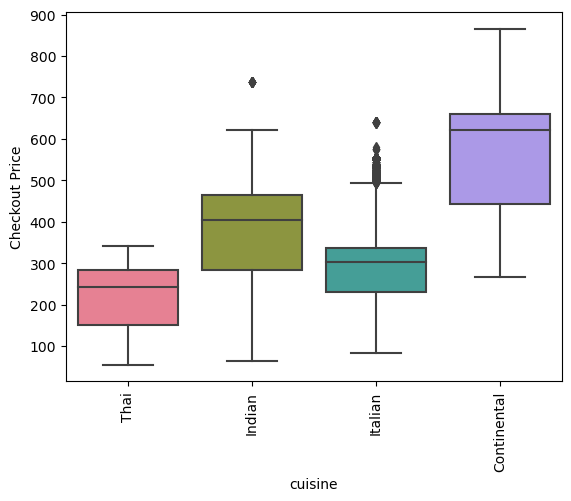

In [28]:
# sns.set_palette('pastel')
sns.boxplot(data=food_train1, x="cuisine", y='base_price',palette='husl')
plt.ylabel("Checkout Price")
plt.xticks(rotation=90)
plt.show()

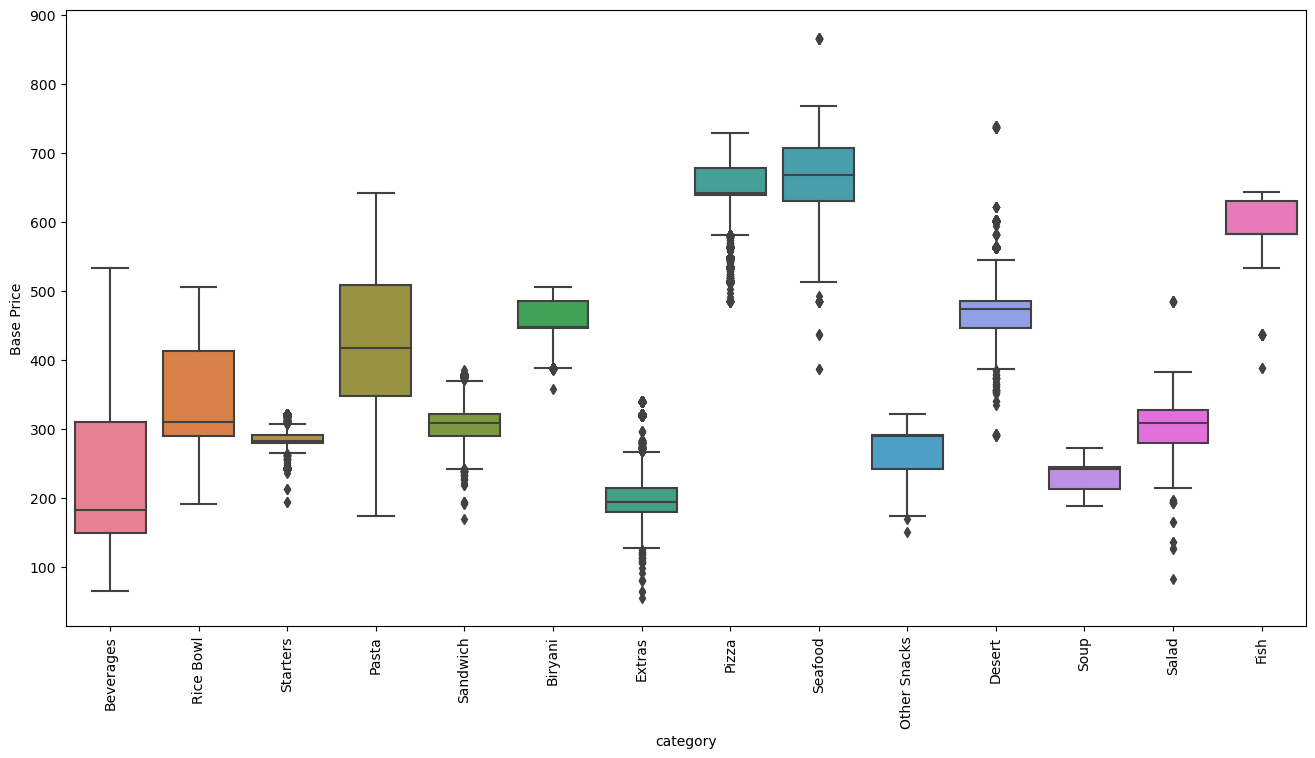

In [29]:
plt.figure(figsize=(16, 8)) 
sns.boxplot(data=food_train1, x="category", y="base_price",palette='husl')
plt.ylabel("Base Price")
plt.xticks(rotation=90)
plt.show()

In [30]:
food_train1.emailer_for_promotion.value_counts()

emailer_for_promotion
0    419498
1     37050
Name: count, dtype: int64

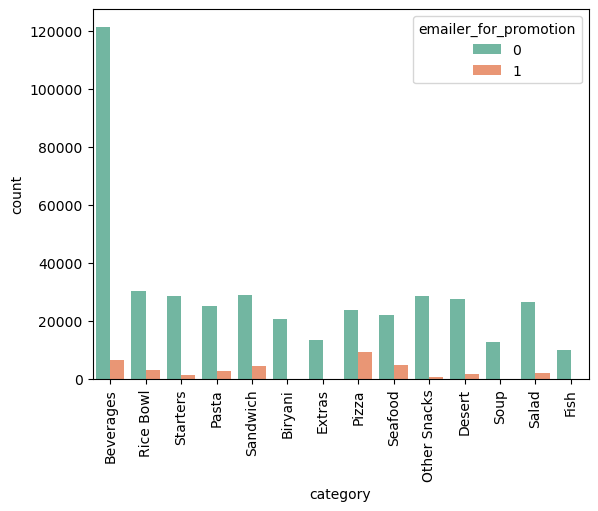

In [31]:
# sns.set_palette('pastel')
sns.countplot(data=food_train1, x="category", hue="emailer_for_promotion",palette='Set2')
plt.xticks(rotation=90)
plt.show()

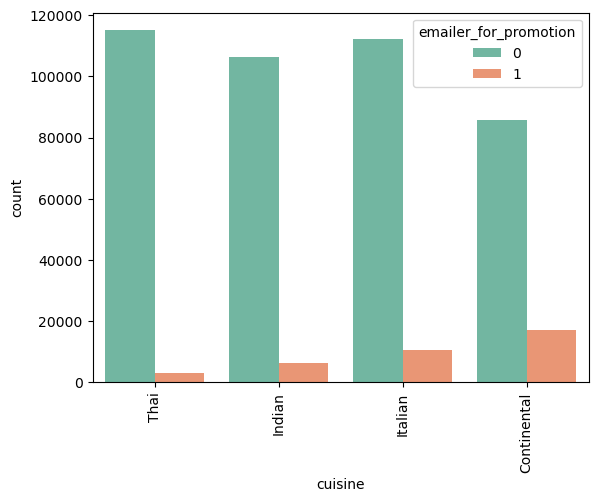

In [32]:
# sns.set_palette('pastel')
sns.countplot(data=food_train1, x="cuisine", hue="emailer_for_promotion",palette='Set2')
plt.xticks(rotation=90)
plt.show()

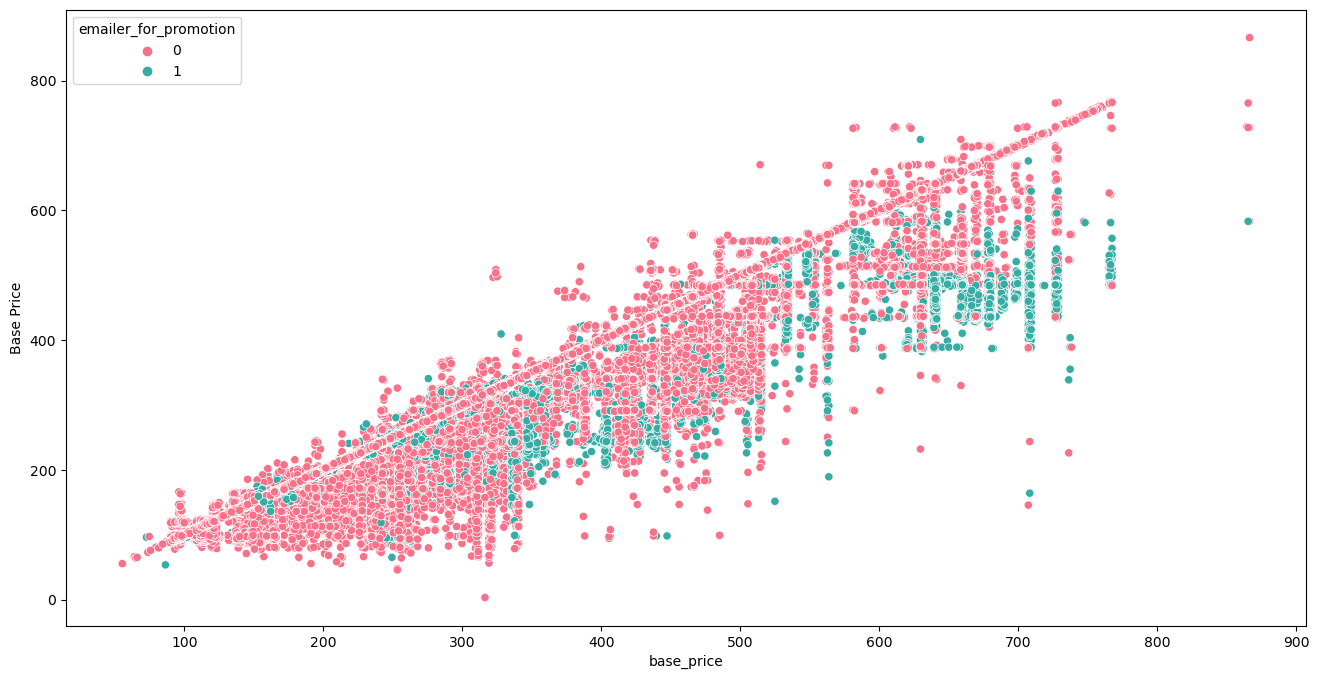

In [33]:
# sns.set_palette('pastel')
plt.figure(figsize=(16, 8))
sns.scatterplot(data=food_train1, x="base_price", y = "checkout_price" , hue="emailer_for_promotion",palette='husl')
plt.ylabel("Base Price")
#plt.xticks(rotation=90)
plt.show()

In [34]:
food_train1.homepage_featured.value_counts()

homepage_featured
0    406693
1     49855
Name: count, dtype: int64

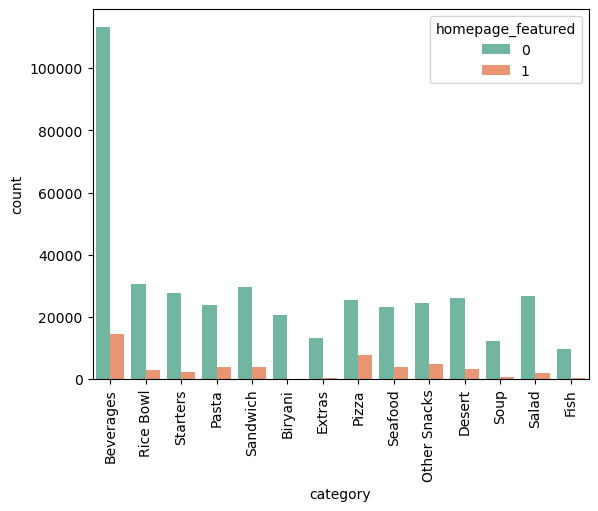

In [35]:
# sns.set_palette('pastel')
sns.countplot(data=food_train1, x="category", hue="homepage_featured",palette='Set2')
plt.xticks(rotation=90)
plt.show()

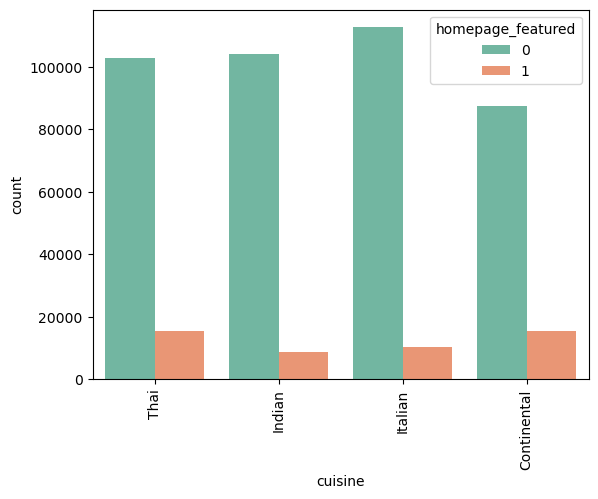

In [36]:
# sns.set_palette('pastel')
sns.countplot(data=food_train1, x="cuisine", hue="homepage_featured",palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [37]:
food_train1.num_orders.value_counts()

num_orders
13      12397
15      12294
14      12270
28      11548
27      11462
        ...  
3658        1
4373        1
6657        1
6441        1
3631        1
Name: count, Length: 1250, dtype: int64

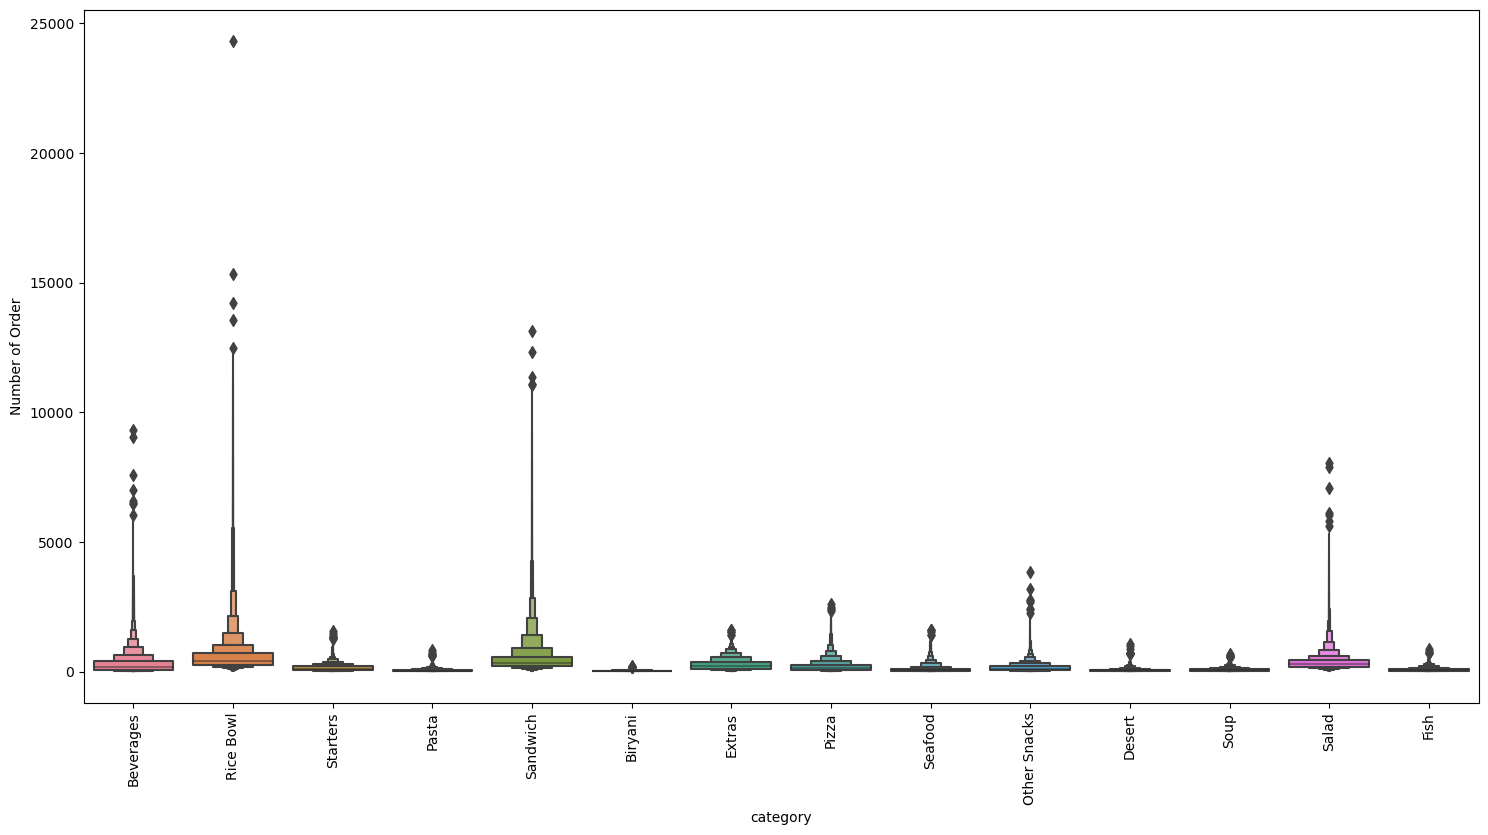

In [38]:
plt.figure(figsize=(18, 9)) 
sns.boxenplot(data=food_train1, x="category", y="num_orders",palette='husl')
plt.ylabel("Number of Order")
plt.xticks(rotation=90)
plt.show()

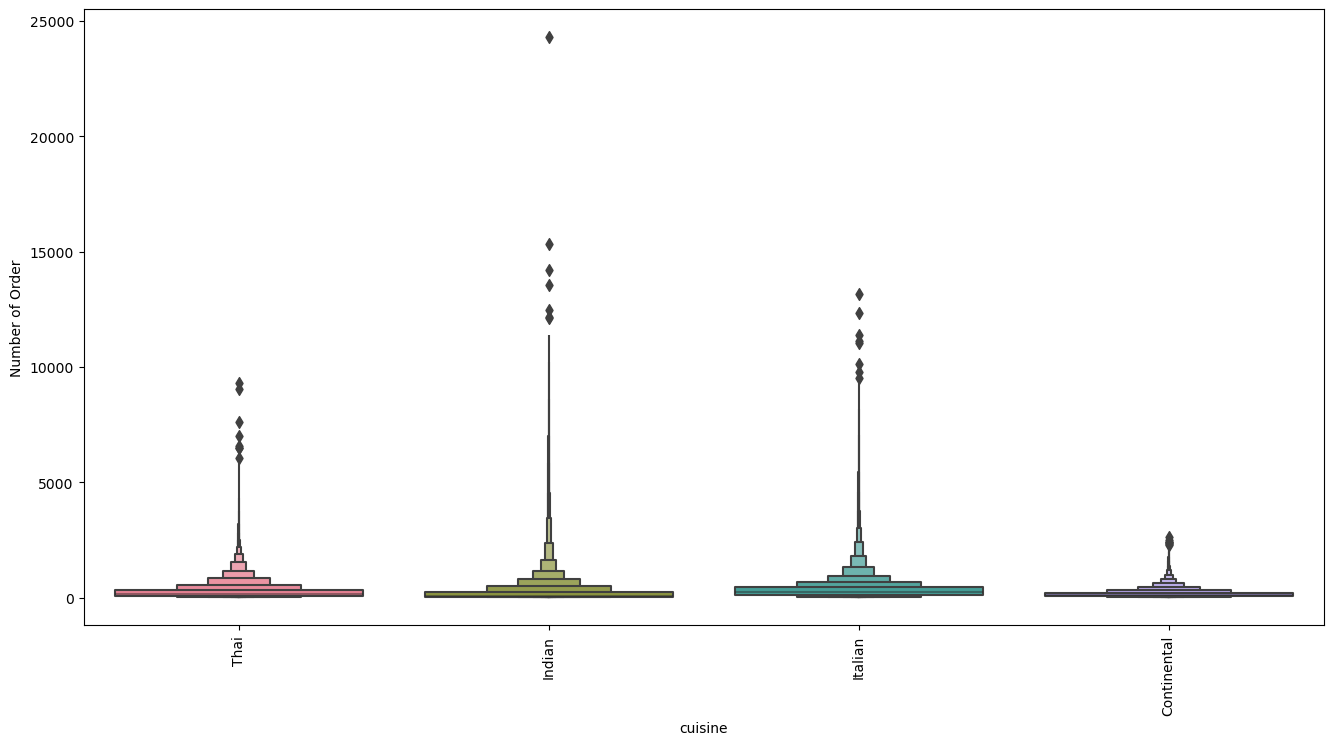

In [39]:
plt.figure(figsize=(16, 8)) 
sns.boxenplot(data=food_train1, x="cuisine", y="num_orders",palette='husl')
plt.ylabel("Number of Order")
plt.xticks(rotation=90)
plt.show()

In [40]:
food_train1.center_type.value_counts()

center_type
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: count, dtype: int64

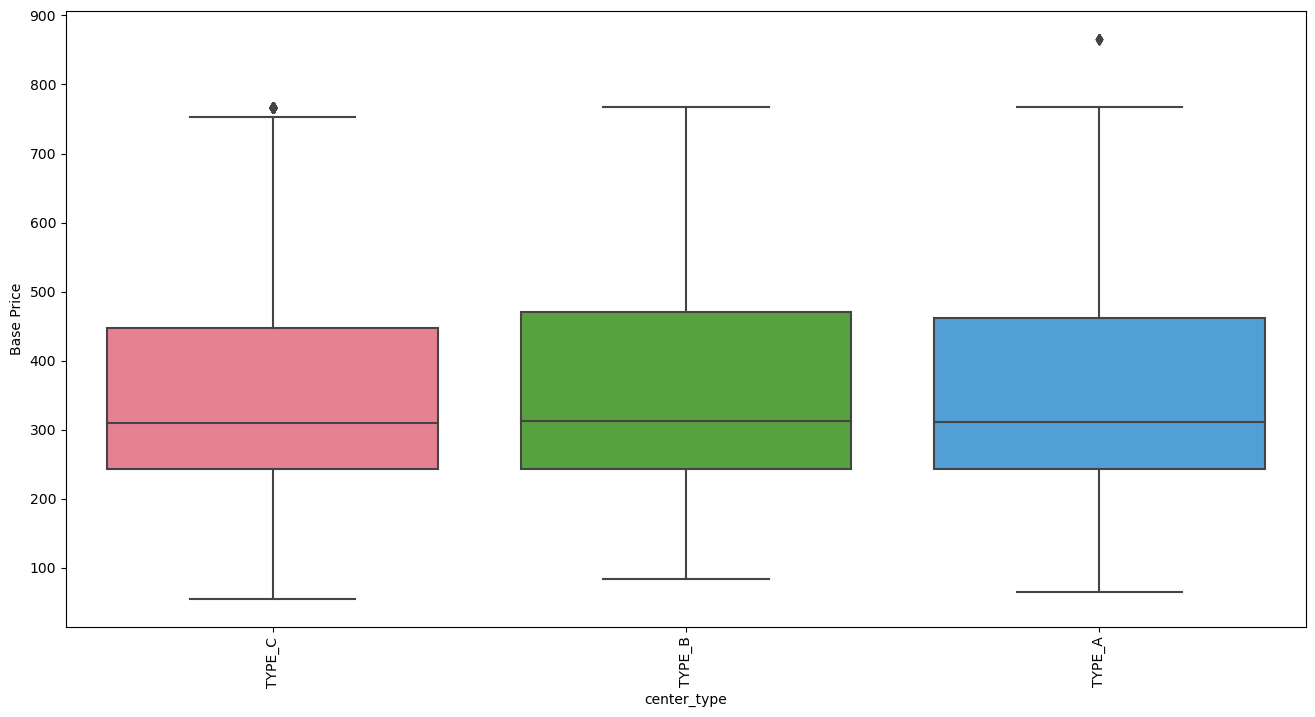

In [41]:
plt.figure(figsize=(16, 8)) 
sns.boxplot(data=food_train1, x="center_type", y="base_price",palette='husl')
plt.ylabel("Base Price")
plt.xticks(rotation=90)
plt.show()

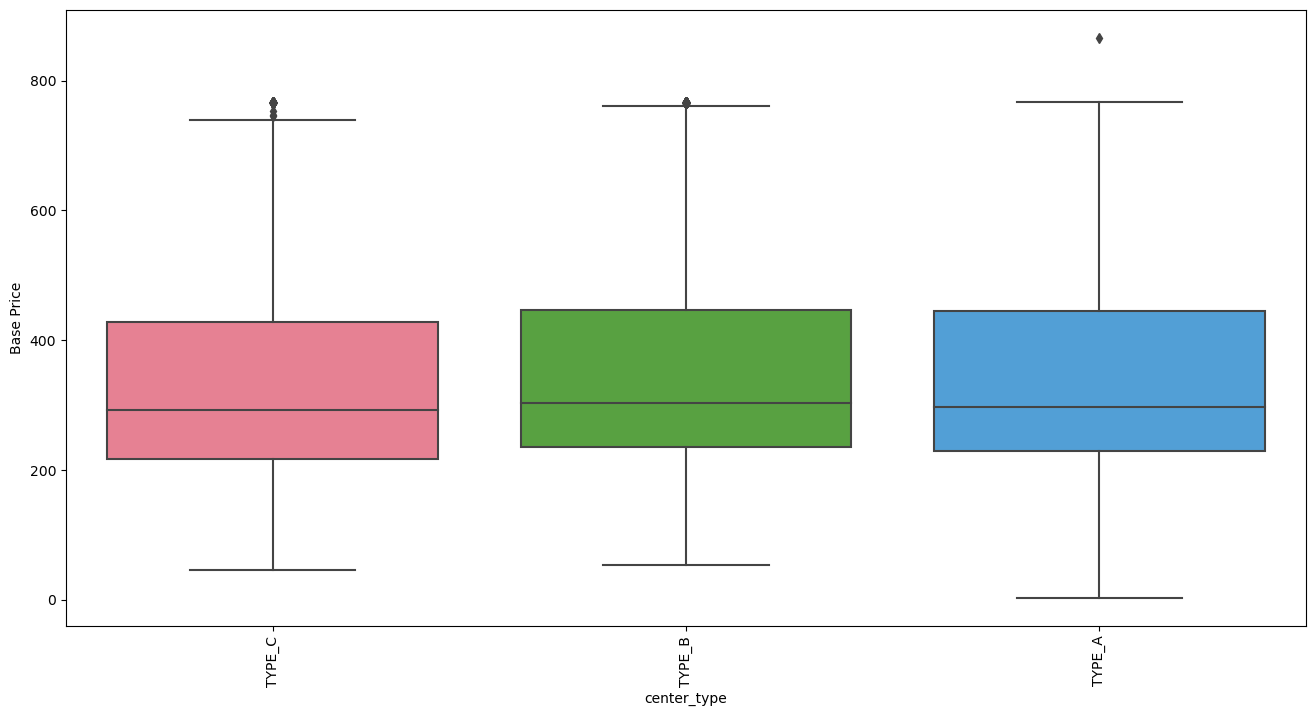

In [42]:
plt.figure(figsize=(16, 8)) 
sns.boxplot(data=food_train1, x="center_type", y="checkout_price",palette='husl')
plt.ylabel("Base Price")
plt.xticks(rotation=90)
plt.show()

In [43]:
food_train1.op_area.value_counts()

op_area
4.0    52548
3.9    48533
3.8    40080
4.4    26060
4.5    25688
2.8    25503
4.1    23346
7.0    20686
4.8    18648
3.4    17258
3.6    16821
5.1    13366
4.2    12608
2.7    12430
3.0    11184
2.0     9512
6.7     7046
6.3     7015
5.6     6993
3.7     6801
3.5     6666
3.2     6333
5.0     6164
5.3     6053
4.6     5983
4.7     5975
2.4     5021
2.9     4712
1.9     4083
0.9     3432
Name: count, dtype: int64

For Model Building first convert Categorical Variables into Numerical Labels. Lets use Label Encoder method 

As we want categorical column to convert it into numerical labels for both train and test data, we can create each instance for each column

In [44]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
label_encoder1 = LabelEncoder()

# Fit and transform the categorical column to convert it into numerical labels
food_train1['cuisine'] = label_encoder1.fit_transform(food_train1['cuisine'])

# Now, the 'cuisine' column is encoded into the 'cuisine_e' column with numerical values

In [45]:
food_train1.cuisine.value_counts()

cuisine
2    122925
3    118216
1    112612
0    102795
Name: count, dtype: int64

In [46]:
label_encoder2 = LabelEncoder()
food_train1['category'] = label_encoder2.fit_transform(food_train1['category'])

In [47]:
food_train1.category.value_counts()

category
0     127890
8      33408
10     33291
7      33138
13     29941
5      29379
2      29294
9      28559
6      27694
11     26916
1      20614
3      13562
12     12675
4      10187
Name: count, dtype: int64

In [48]:
label_encoder3 = LabelEncoder()
food_train1['center_type'] = label_encoder3.fit_transform(food_train1['center_type'])

In [49]:
food_train1.center_type.value_counts()

center_type
0    262881
2     99593
1     94074
Name: count, dtype: int64

In [50]:
food_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  int32  
 10  cuisine                456548 non-null  int32  
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int32  
 14  op_area                456548 non-nu

In [51]:
food_train1 = food_train1.drop(['id'], axis=1)
food_train1.head()

week  center_id  meal_id  checkout_price  base_price  \
0     1         55     1885          136.83      152.29   
1     1         55     1993          136.83      135.83   
2     1         55     2539          134.86      135.86   
3     1         55     2139          339.50      437.53   
4     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  category  cuisine  \
0                      0                  0         177         0        3   
1                      0                  0         270         0        3   
2                      0                  0         189         0        3   
3                      0                  0          54         0        1   
4                      0                  0          40         0        1   

   city_code  region_code  center_type  op_area  
0        647           56            2      2.0  
1        647           56            2      2.0  
2        647           56            2      2.0  
3        647           56            2      2.0  
4        647           56            2      2.0

<Axes: >

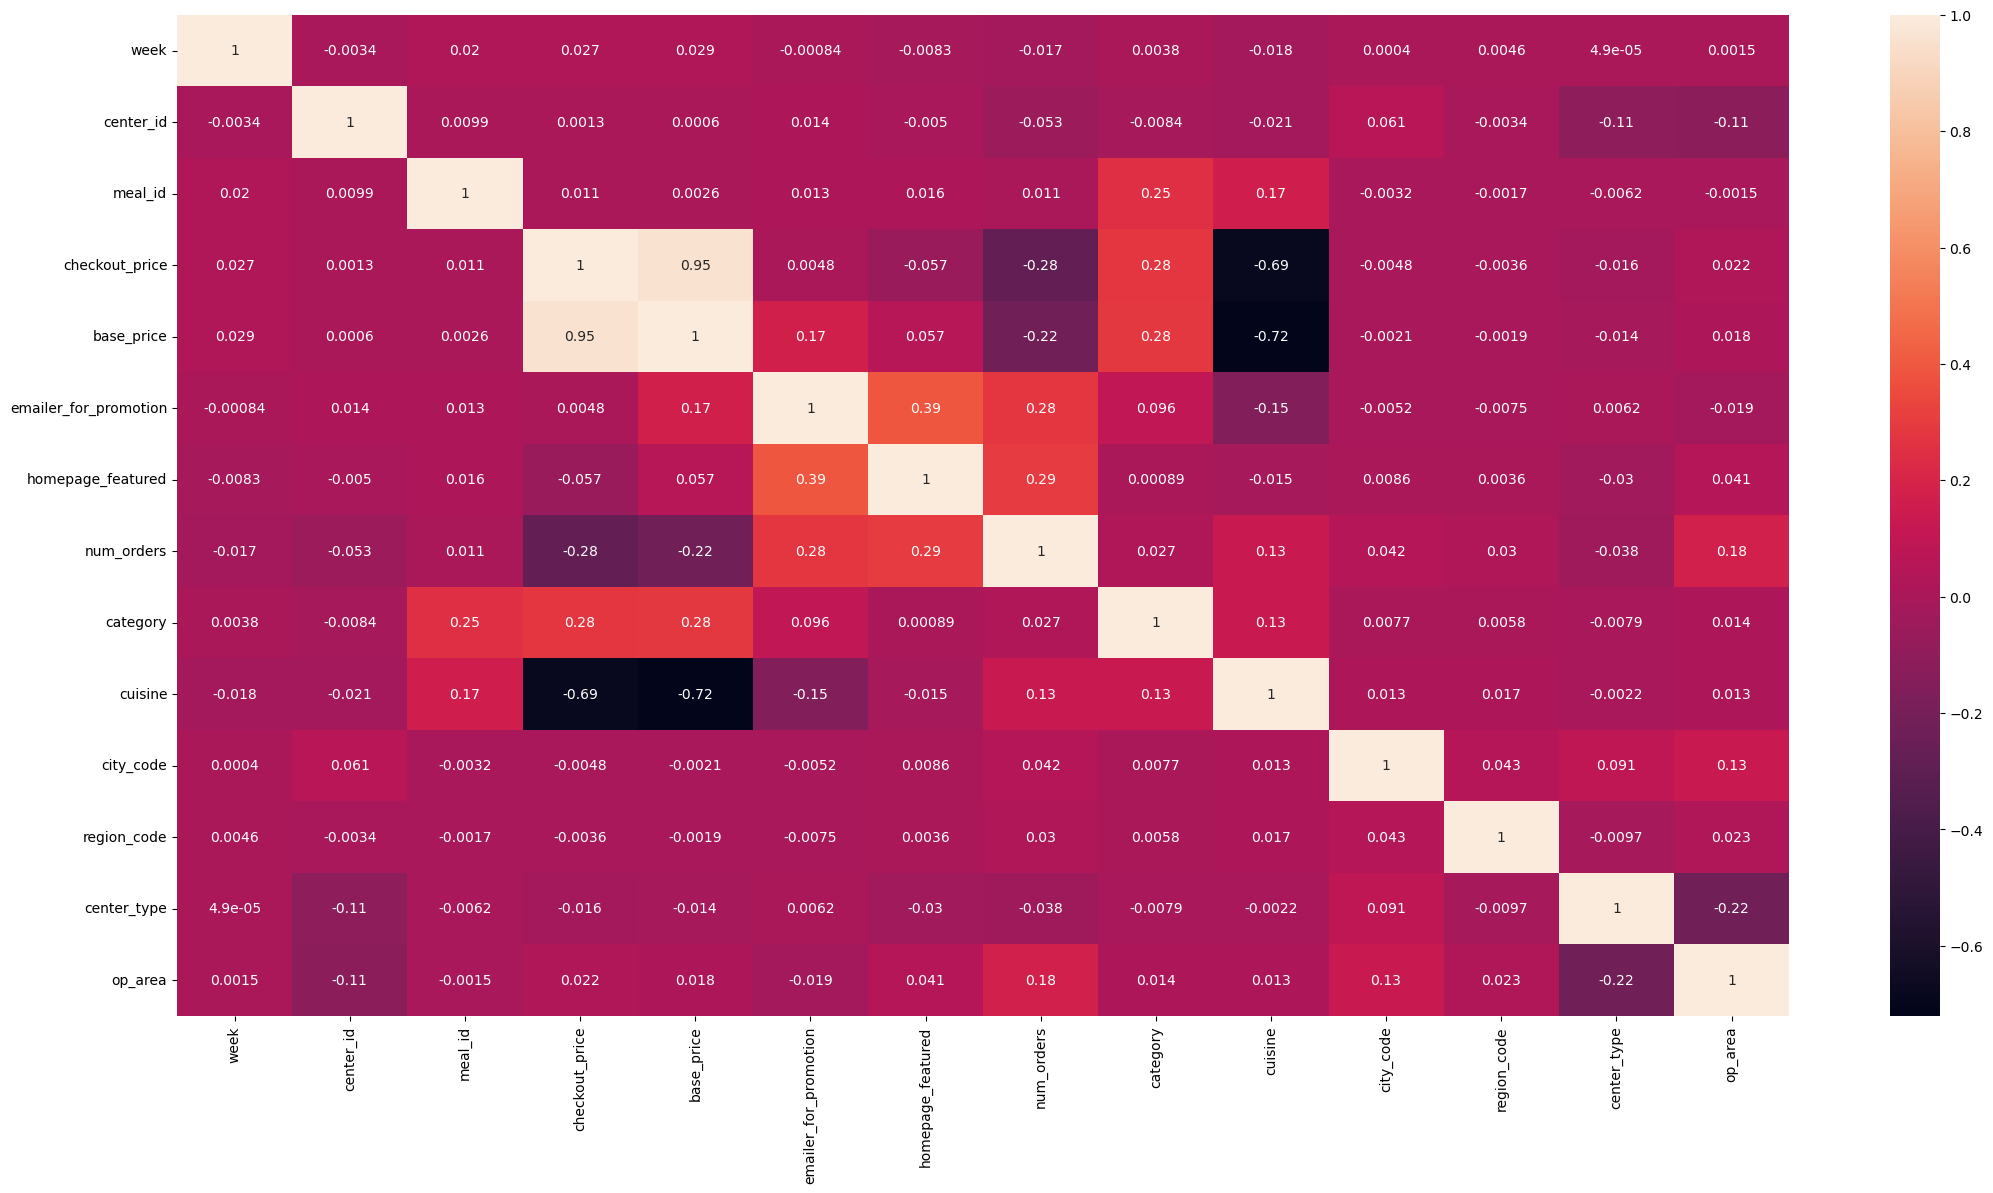

In [52]:
##Correlation Plot
import seaborn as sns
plt.figure(figsize=(26,13))
sns.heatmap(food_train1.corr(), annot=True)

## Model Building Step 1

### Feature Selection using Correlation

In [53]:
# Selects the 10 columns with the largest correlation values with respect to the 'num_orders' column using the .nlargest() method.
food_train_corr = food_train1.corr(method='pearson')
corr_10col = food_train_corr.nlargest(10, 'num_orders').index
corr_10col

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category', 'meal_id', 'week'],
      dtype='object')

In [54]:
food_train2 = food_train1[corr_10col]
food_train2.head()

num_orders  homepage_featured  emailer_for_promotion  op_area  cuisine  \
0         177                  0                      0      2.0        3   
1         270                  0                      0      2.0        3   
2         189                  0                      0      2.0        3   
3          54                  0                      0      2.0        1   
4          40                  0                      0      2.0        1   

   city_code  region_code  category  meal_id  week  
0        647           56         0     1885     1  
1        647           56         0     1993     1  
2        647           56         0     2539     1  
3        647           56         0     2139     1  
4        647           56         0     2631     1

In [55]:
food_test1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured   category cuisine  city_code  \
0                      0                  0  Beverages    Thai        647   
1                      0                  0  Beverages    Thai        647   
2                      0                  0  Beverages    Thai        647   
3                      0                  0  Beverages  Indian        647   
4                      0                  0  Beverages  Indian        647   

   region_code center_type  op_area  
0           56      TYPE_C      2.0  
1           56      TYPE_C      2.0  
2           56      TYPE_C      2.0  
3           56      TYPE_C      2.0  
4           56      TYPE_C      2.0

In [56]:
food_test1['cuisine']=label_encoder1.fit_transform(food_test1['cuisine'])
food_test1['category']=label_encoder2.fit_transform(food_test1['category'])
food_test1['center_type']=label_encoder3.fit_transform(food_test1['center_type'])
food_test1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  category  cuisine  city_code  \
0                      0                  0         0        3        647   
1                      0                  0         0        3        647   
2                      0                  0         0        3        647   
3                      0                  0         0        1        647   
4                      0                  0         0        1        647   

   region_code  center_type  op_area  
0           56            2      2.0  
1           56            2      2.0  
2           56            2      2.0  
3           56            2      2.0  
4           56            2      2.0

In [57]:
food_testF = food_test1.drop(columns=['id','center_id','checkout_price','base_price','center_type'],axis=1)
food_testF.head()

week  meal_id  emailer_for_promotion  homepage_featured  category  cuisine  \
0   146     1885                      0                  0         0        3   
1   146     1993                      0                  0         0        3   
2   146     2539                      0                  0         0        3   
3   146     2631                      0                  0         0        1   
4   146     1248                      0                  0         0        1   

   city_code  region_code  op_area  
0        647           56      2.0  
1        647           56      2.0  
2        647           56      2.0  
3        647           56      2.0  
4        647           56      2.0

In [58]:
food_train2.head()

num_orders  homepage_featured  emailer_for_promotion  op_area  cuisine  \
0         177                  0                      0      2.0        3   
1         270                  0                      0      2.0        3   
2         189                  0                      0      2.0        3   
3          54                  0                      0      2.0        1   
4          40                  0                      0      2.0        1   

   city_code  region_code  category  meal_id  week  
0        647           56         0     1885     1  
1        647           56         0     1993     1  
2        647           56         0     2539     1  
3        647           56         0     2139     1  
4        647           56         0     2631     1

In [59]:
food_train2.columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category', 'meal_id', 'week'],
      dtype='object')

In [60]:
food_testF = food_testF[[ 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category', 'meal_id', 'week']]

In [61]:
food_testF.head()

homepage_featured  emailer_for_promotion  op_area  cuisine  city_code  \
0                  0                      0      2.0        3        647   
1                  0                      0      2.0        3        647   
2                  0                      0      2.0        3        647   
3                  0                      0      2.0        1        647   
4                  0                      0      2.0        1        647   

   region_code  category  meal_id  week  
0           56         0     1885   146  
1           56         0     1993   146  
2           56         0     2539   146  
3           56         0     2631   146  
4           56         0     1248   146

## Build Models

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(food_train2.drop('num_orders',axis=1),food_train2['num_orders'], test_size=0.20,random_state=0)

In [63]:
print('Shape X_train data {}'.format(X_train.shape))
X_train.head()

Shape X_train data (365238, 9)


homepage_featured  emailer_for_promotion  op_area  cuisine  city_code  \
141016                  0                      0      4.0        1        526   
406574                  0                      0      3.8        2        562   
189872                  0                      1      5.0        0        526   
323934                  0                      0      4.0        1        576   
142275                  0                      0      3.4        0        698   

        region_code  category  meal_id  week  
141016           34         0     2139    48  
406574           77         6     1216   130  
189872           34         7     2581    64  
323934           34         1     1770   105  
142275           23        11     2867    48

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,y_train)) # R^2 is of train dataset
print("Coef for Variable are:\n",lrm.coef_)

Intercept is:  -178.1509312634122
Coeff_of determination R^2 is:  0.1741312694162681
Coef for Variable are:
 [ 2.53558110e+02  3.34291245e+02  6.10839672e+01  6.01457060e+01
  9.16332194e-02  5.19898978e-01 -1.30159640e+00 -1.33360997e-02
 -1.18302582e-01]


In [65]:
# separate the coefficient
Co_Eff = pd.DataFrame(lrm.coef_.transpose(),X_test.columns,columns=['Coefficient'])
Co_Eff

Coefficient
homepage_featured       253.558110
emailer_for_promotion   334.291245
op_area                  61.083967
cuisine                  60.145706
city_code                 0.091633
region_code               0.519899
category                 -1.301596
meal_id                  -0.013336
week                     -0.118303

In [66]:
# predicted Score Y^
y_pred = lrm.predict(X_test)
y_pred

array([567.6930299 , 273.85198426, 339.11740709, ..., 109.62877665,
       288.08103275, 144.94839263])

In [67]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE 206.6844718451461
MSE 125217.52739091123
RMSE 353.8608870600299


In [68]:
from sklearn.metrics import mean_squared_log_error
y_pred = lrm.predict(X_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

1.2992676148831002

In [69]:
from sklearn.metrics import r2_score
print("R-Squared of test_data : ",r2_score(y_test,y_pred))  ## This is for Test data

R-Squared of test_data :  0.1781349933908638


In [70]:
# lets look at the other parameter using Stats Model
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     8556.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:57:52   Log-Likelihood:            -2.6692e+06
No. Observations:              365238   AIC:                         5.338e+06
Df Residuals:                  365228   BIC:                         5.338e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -178.1509      6.422    -27.743      0.000    -190.737    -165.565
homepage_featured       253.5581      2.089    121.390      0.000     249.464     257.652
emailer_for_promotion   334.2912      2.428    137.657      0.000     329.532     339.051
op_area                  61.0840      0.553    110.405      0.000      60.000      62.168
cuisine                  60.1457      0.561    107.221      0.000      59.046      61.245
city_code                 0.0916      0.009     10.059      0.000       0.074       0.109
region_code               0.5199      0.034     15.336      0.000       0.453       0.586
category                 -1.3016      0.140     -9.295      0.000      -1.576      -1.027
meal_id                  -0.0133      0.001    -11.715      0.000      -0.016      -0.011
week                     -0.1183      0.014     -8.218      0.000      -0.147      -0.090
==============================================================================
Omnibus:                   485677.557   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        370802816.409
Skew:                           7.088   Prob(JB):                         0.00
Kurtosis:                     158.450   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

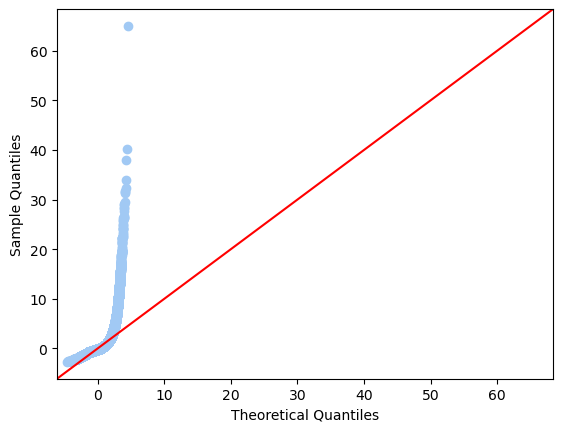

In [71]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

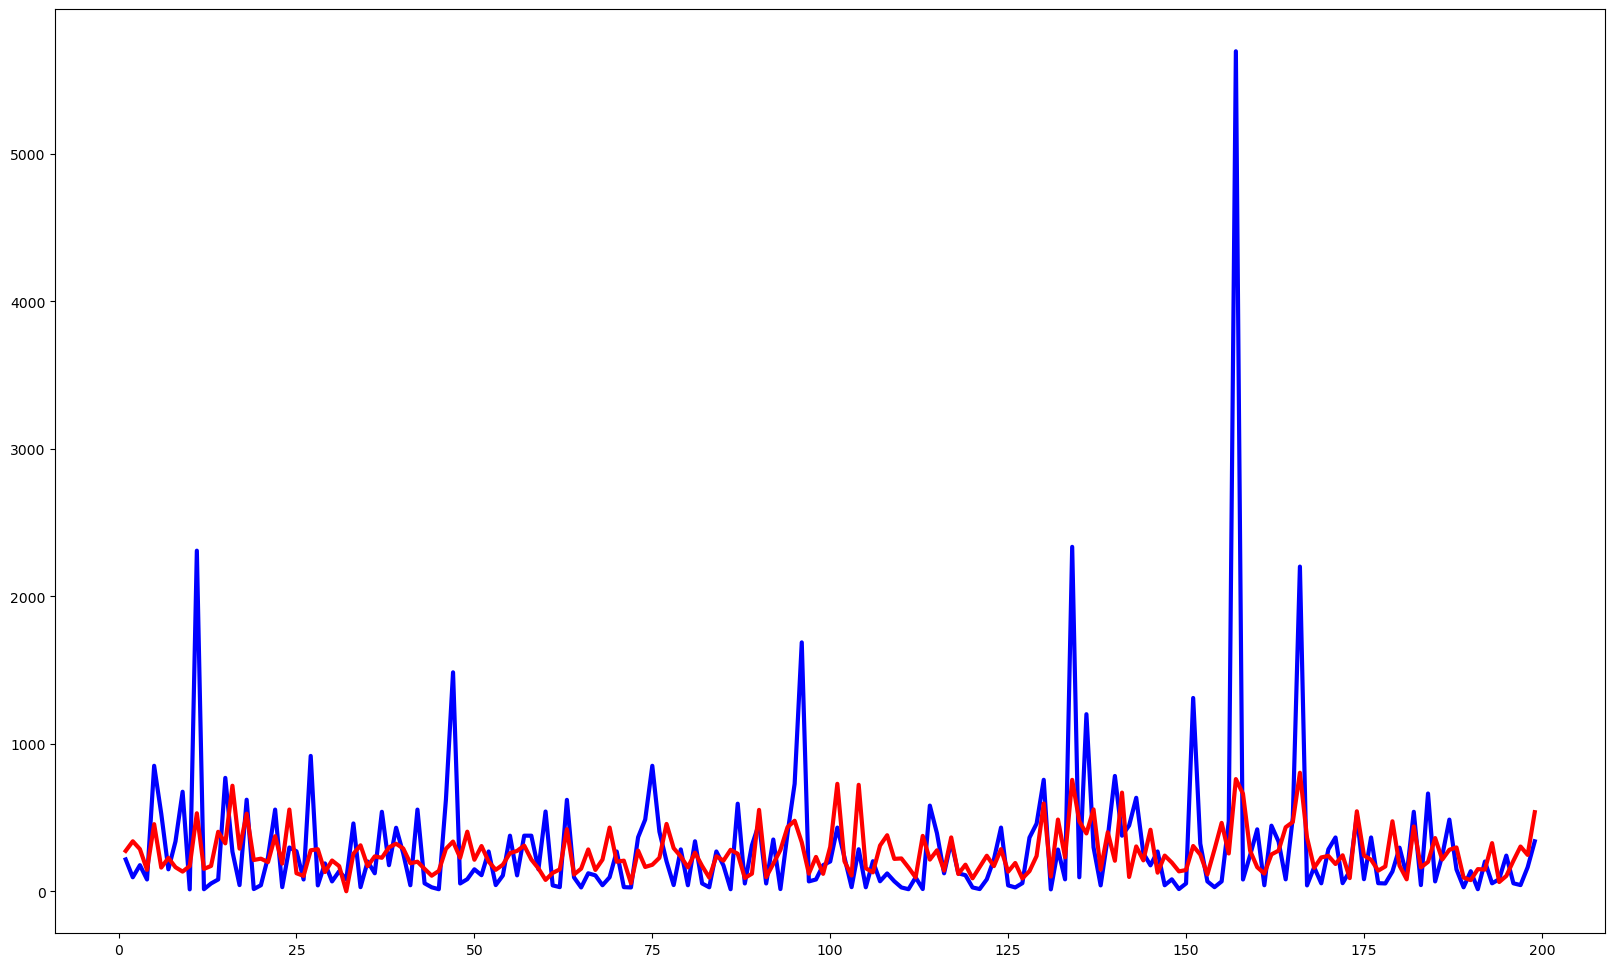

In [72]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values

cnt=[i for i in range(1,200,1)]
plt.figure(figsize=(20, 12))
plt.plot(cnt,y_test[1:200],color="blue", linewidth=3,linestyle="-")  #Actual
plt.plot(cnt,y_pred[1:200],color="red", linewidth=3,linestyle="-")   #predicted
plt.show()

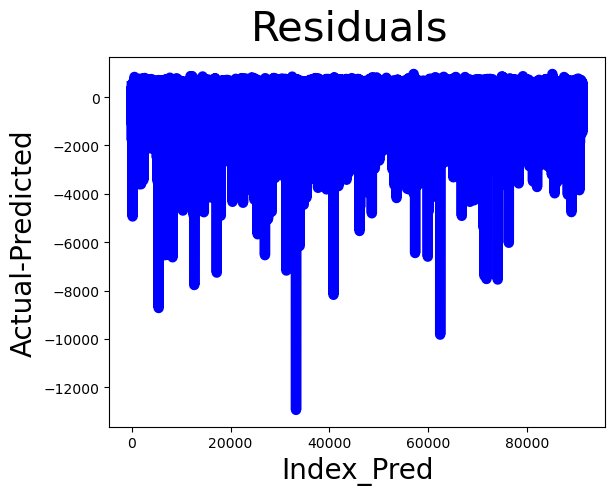

In [73]:
## Plotting the residuals 30% of 21613=6483.9 but take 6485 since dimension vary
cnt = [i for i in range(1, len(y_pred) + 1)]
fig=plt.figure()
plt.plot(cnt,y_pred-y_test, color = 'blue', linewidth = 7.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

## Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)

In [75]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_dtr = r2_score(y_test, y_pred)
print("R-squared DTR:", r2_dtr)

MAE 89.30069543313985
MSE 41531.71839064725
RMSE 203.79332273322217
R-squared DTR: 0.7272598866565643


In [76]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.645626829800885

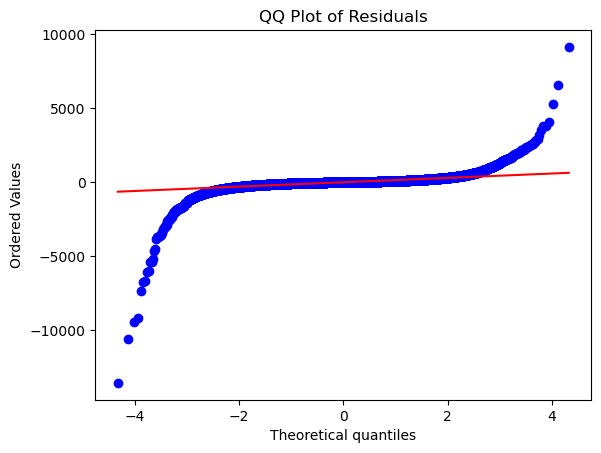

In [77]:
import scipy.stats as stats
#import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

A residual plot shows the relationship between the predicted values and the residuals. It can help you identify patterns or heteroscedasticity in the residuals. python

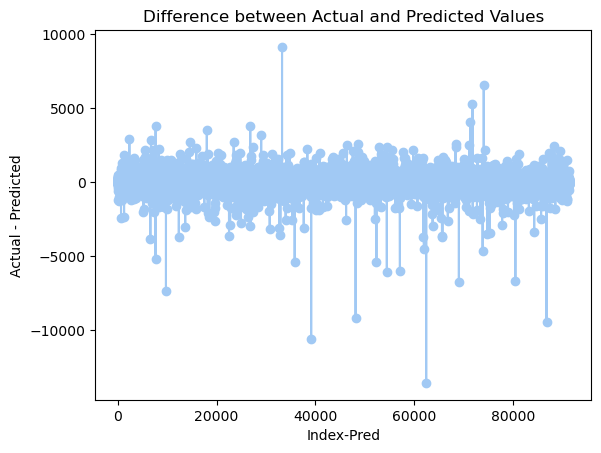

In [78]:
# Create a plot of the difference between actual and predicted values
plt.plot(range(len(y_test)), y_test - y_pred, marker='o', linestyle='-')
plt.xlabel("Index-Pred")
plt.ylabel("Actual - Predicted")
plt.title("Difference between Actual and Predicted Values")
plt.show()

## Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
y_pred = RF.predict(X_test)
y_pred[y_pred<0] = 0

In [81]:
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.5176490890785639

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [83]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 72.11363895740816
Mean Squared Error: 23975.172618940403
R-squared: 0.8425542801765988


In [84]:
print('Coeff_of determination R^2 is: ',lrm_mi.score(x_train,y_train)) # R^2 is of train dataset

R-Squared of test_data :  0.8425542801765988


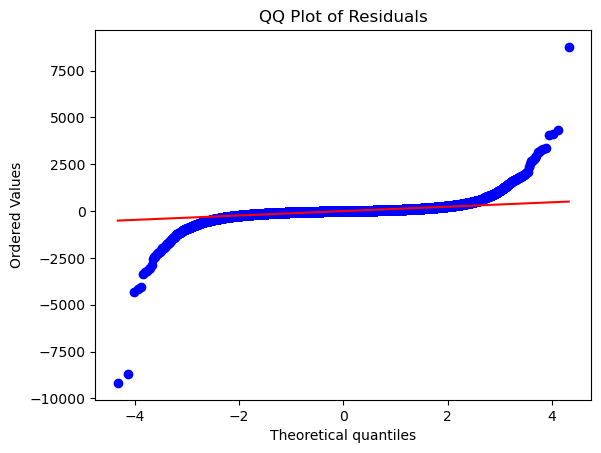

In [85]:
import scipy.stats as stats
#import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

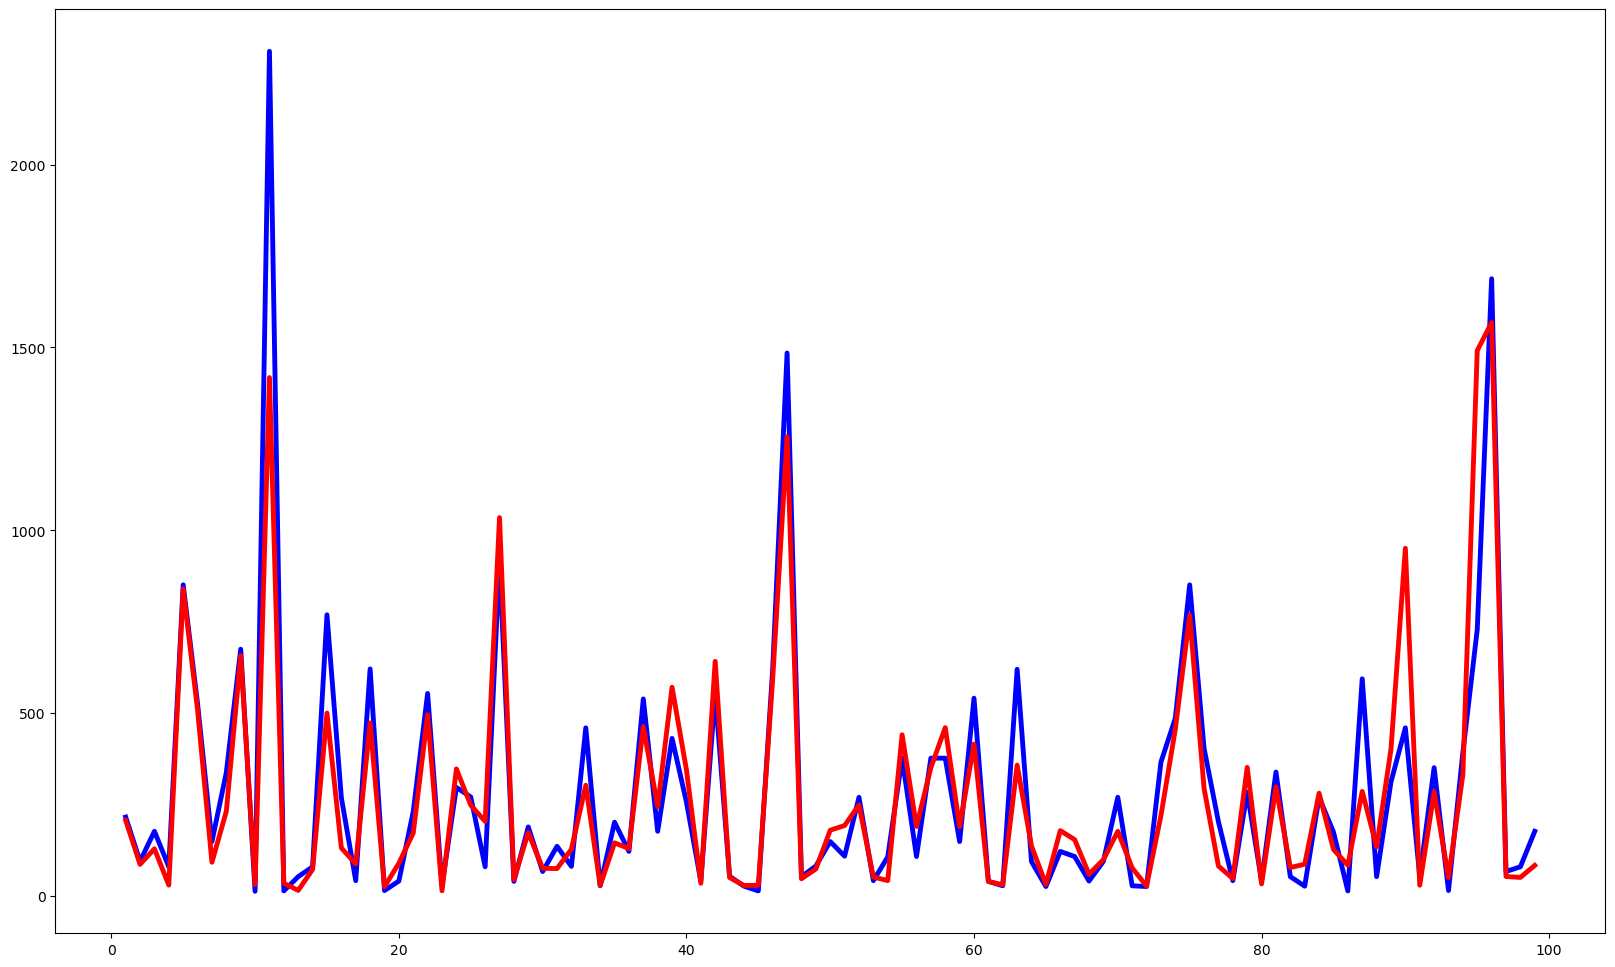

In [86]:
cnt=[i for i in range(1,100,1)]
plt.figure(figsize=(20, 12))
plt.plot(cnt,y_test[1:100],color="blue", linewidth=3.5,linestyle="-")  #Actual
plt.plot(cnt,y_pred[1:100],color="red", linewidth=3.5,linestyle="-")   #predicted
plt.show()

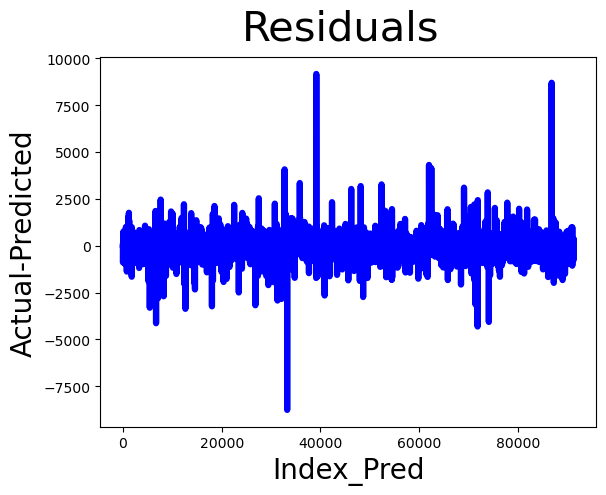

In [87]:
cnt = [i for i in range(1, len(y_pred) + 1)]

fig = plt.figure()
plt.plot(cnt, y_pred - y_test, color='blue', linewidth=4.5, linestyle='-')
fig.suptitle('Residuals', fontsize=30)
plt.xlabel('Index_Pred', fontsize=20)
plt.ylabel('Actual-Predicted', fontsize=20)
plt.show()

In [88]:
food_testF.head()

homepage_featured  emailer_for_promotion  op_area  cuisine  city_code  \
0                  0                      0      2.0        3        647   
1                  0                      0      2.0        3        647   
2                  0                      0      2.0        3        647   
3                  0                      0      2.0        1        647   
4                  0                      0      2.0        1        647   

   region_code  category  meal_id  week  
0           56         0     1885   146  
1           56         0     1993   146  
2           56         0     2539   146  
3           56         0     2631   146  
4           56         0     1248   146

In [89]:
food_train2.head()

num_orders  homepage_featured  emailer_for_promotion  op_area  cuisine  \
0         177                  0                      0      2.0        3   
1         270                  0                      0      2.0        3   
2         189                  0                      0      2.0        3   
3          54                  0                      0      2.0        1   
4          40                  0                      0      2.0        1   

   city_code  region_code  category  meal_id  week  
0        647           56         0     1885     1  
1        647           56         0     1993     1  
2        647           56         0     2539     1  
3        647           56         0     2139     1  
4        647           56         0     2631     1

## Makes Prediction By using above models

In [90]:
pred_food_test= lrm.predict(food_testF)
pred_food_test[pred_food_test<0] = 0
submit_lrm_Corr= pd.DataFrame({
    'id' :food_test1['id'],
    'num_orders' : pred_food_test
})
submit_lrm_Corr.head()

id  num_orders
0  1028232  170.444432
1  1127204  169.004133
2  1212707  161.722623
3  1082698   40.204290
4  1400926   58.648116

In [91]:
submit_lrm_Corr.to_csv('FOF_LR_Corr.csv', index=False)

In [92]:
pred_food_test= DTR.predict(food_testF)
pred_food_test[pred_food_test<0] = 0
submit_DTR_Corr = pd.DataFrame({
    'id' :food_test1['id'],
    'num_orders' : pred_food_test
})
submit_DTR_Corr.head()

id  num_orders
0  1028232       121.0
1  1127204        54.0
2  1212707       135.0
3  1082698        96.0
4  1400926        68.0

In [93]:
submit_DTR_Corr.to_csv('FOF_DTR_Corr.csv', index=False)

In [94]:
pred_food_test= RF.predict(food_testF)
pred_food_test[pred_food_test<0] = 0
submit_RF_Corr = pd.DataFrame({
    'id' :food_test1['id'],
    'num_orders' : pred_food_test
})
submit_RF_Corr.head()

id  num_orders
0  1028232      135.27
1  1127204       95.93
2  1212707      127.24
3  1082698       81.41
4  1400926       65.16

In [95]:
submit_RF_Corr.to_csv('FOF_RF_Corr.csv', index=False)

We have evaluated three different regression models by using Correlation for Feature Selection : 
    
Now, let's draw conclusions:

The Linear Regression model has the highest MAE, MSE, RMSE, and RMSLE values among the three models, indicating the worst performance. Additionally, its R-squared values are very low (0.1741 and 0.1781), suggesting poor goodness of fit.

The Decision Tree Regressor (DTR) performs better than Linear Regression with lower MAE, MSE, RMSE, and RMSLE values. Its R-squared value (0.7243) indicates a moderate level of goodness of fit.

The Random Forest Regressor has the lowest MAE, MSE, and RMSLE values, and the highest R-squared value (0.8414), suggesting the best overall performance among the three models. It has the smallest errors and the highest explained variance, making it the preferred choice.

Hence the Random Forest Regressor is the best model for our dataset. It provides the most accurate predictions and better captures the underlying patterns in the data compared to the other two models.



### Feature Selection using ExtraTreesRegressor

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
food_train1.head()

week  center_id  meal_id  checkout_price  base_price  \
0     1         55     1885          136.83      152.29   
1     1         55     1993          136.83      135.83   
2     1         55     2539          134.86      135.86   
3     1         55     2139          339.50      437.53   
4     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  category  cuisine  \
0                      0                  0         177         0        3   
1                      0                  0         270         0        3   
2                      0                  0         189         0        3   
3                      0                  0          54         0        1   
4                      0                  0          40         0        1   

   city_code  region_code  center_type  op_area  
0        647           56            2      2.0  
1        647           56            2      2.0  
2        647           56            2      2.0  
3        647           56            2      2.0  
4        647           56            2      2.0

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(food_train1.drop('num_orders',axis=1),food_train1['num_orders'], test_size=0.20,random_state=42)

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

In [100]:
ex_regressor = ExtraTreesRegressor()

In [101]:
ex_regressor.fit(X_train,y_train)

ExtraTreesRegressor()

In [102]:
ex_regressor.feature_importances_

array([0.07127935, 0.03769708, 0.07221492, 0.15199664, 0.08620356,
       0.04980257, 0.08668798, 0.13947819, 0.10358976, 0.03201122,
       0.04106002, 0.02902648, 0.09895224])

In [103]:
ser = pd.Series(ex_regressor.feature_importances_,index=X_train.columns)

In [104]:
ser

week                     0.071279
center_id                0.037697
meal_id                  0.072215
checkout_price           0.151997
base_price               0.086204
emailer_for_promotion    0.049803
homepage_featured        0.086688
category                 0.139478
cuisine                  0.103590
city_code                0.032011
region_code              0.041060
center_type              0.029026
op_area                  0.098952
dtype: float64

In [105]:
top_10_columns = ser.nlargest(10).index
top_10_columns

Index(['checkout_price', 'category', 'cuisine', 'op_area', 'homepage_featured',
       'base_price', 'meal_id', 'week', 'emailer_for_promotion',
       'region_code'],
      dtype='object')

<Axes: title={'center': 'Feature Importance '}>

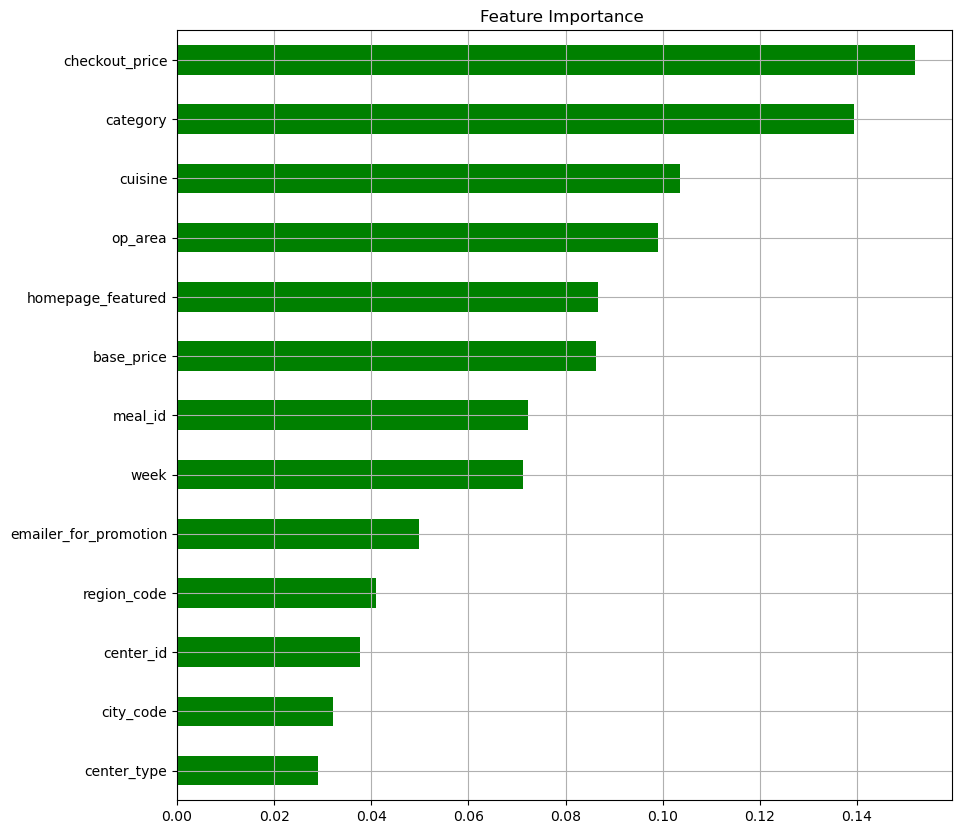

In [106]:
plt.figure(figsize=(10,10))
ser.sort_values(ascending=True).plot(kind='barh',color='green',grid=True,title="Feature Importance ")

In [107]:
food_train3 = pd.concat([food_train1[top_10_columns], food_train1['num_orders']], axis=1)
food_train3.head()

checkout_price  category  cuisine  op_area  homepage_featured  base_price  \
0          136.83         0        3      2.0                  0      152.29   
1          136.83         0        3      2.0                  0      135.83   
2          134.86         0        3      2.0                  0      135.86   
3          339.50         0        1      2.0                  0      437.53   
4          243.50         0        1      2.0                  0      242.50   

   meal_id  week  emailer_for_promotion  region_code  num_orders  
0     1885     1                      0           56         177  
1     1993     1                      0           56         270  
2     2539     1                      0           56         189  
3     2139     1                      0           56          54  
4     2631     1                      0           56          40

## Model Building

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(food_train3.drop('num_orders',axis=1),food_train3['num_orders'], test_size=0.20,random_state=0)

## Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
print('Intercept is: ',lrm.intercept_)
print('Coeff_of determination R^2 is: ',lrm.score(X_train,y_train)) # R^2 is of train dataset
print("Coef for Variable are:\n",lrm.coef_)

Intercept is:  342.65653654289724
Coeff_of determination R^2 is:  0.24368727604263496
Coef for Variable are:
 [-4.61355793e-01  1.41364517e+01 -6.75891632e+01  6.55408635e+01
  2.65862414e+02 -6.96480805e-01 -1.18782823e-05 -6.65779240e-02
  2.97546116e+02  6.09159081e-01]


In [110]:
# separate the coefficient
Co_Eff = pd.DataFrame(lrm.coef_.transpose(),X_test.columns,columns=['Coefficient'])
Co_Eff

Coefficient
checkout_price           -0.461356
category                 14.136452
cuisine                 -67.589163
op_area                  65.540864
homepage_featured       265.862414
base_price               -0.696481
meal_id                  -0.000012
week                     -0.066578
emailer_for_promotion   297.546116
region_code               0.609159

In [111]:
# predicted Score Y^
y_pred = lrm.predict(X_test)
y_pred

array([575.79704575, 276.88509227, 217.63718008, ..., 107.02994441,
       419.88584616, 157.0926605 ])

In [112]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE 194.21091453557986
MSE 114435.19811424408
RMSE 338.28271920723955


In [113]:
# lets look at the other parameter using Stats Model
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                 1.177e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:03:56   Log-Likelihood:            -2.6531e+06
No. Observations:              365238   AIC:                         5.306e+06
Df Residuals:                  365227   BIC:                         5.306e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   342.6565      4.518     75.848      0.000     333.802     351.511
checkout_price           -0.4614      0.015    -30.751      0.000      -0.491      -0.432
category                 14.1365      0.158     89.348      0.000      13.826      14.447
cuisine                 -67.5892      0.882    -76.627      0.000     -69.318     -65.860
op_area                  65.5409      0.525    124.739      0.000      64.511      66.571
homepage_featured       265.8624      2.047    129.855      0.000     261.850     269.875
base_price               -0.6965      0.015    -46.370      0.000      -0.726      -0.667
meal_id               -1.188e-05      0.001     -0.011      0.991      -0.002       0.002
week                     -0.0666      0.014     -4.831      0.000      -0.094      -0.040
emailer_for_promotion   297.5461      2.613    113.864      0.000     292.424     302.668
region_code               0.6092      0.032     18.789      0.000       0.546       0.673
==============================================================================
Omnibus:                   497496.619   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456954538.912
Skew:                           7.372   Prob(JB):                         0.00
Kurtosis:                     175.654   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

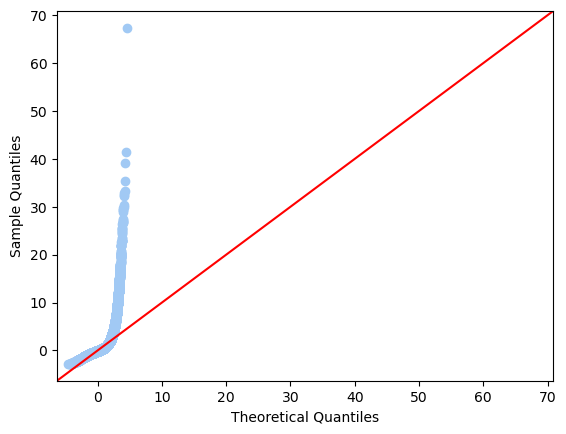

In [114]:
# define residual
res = model.resid
# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

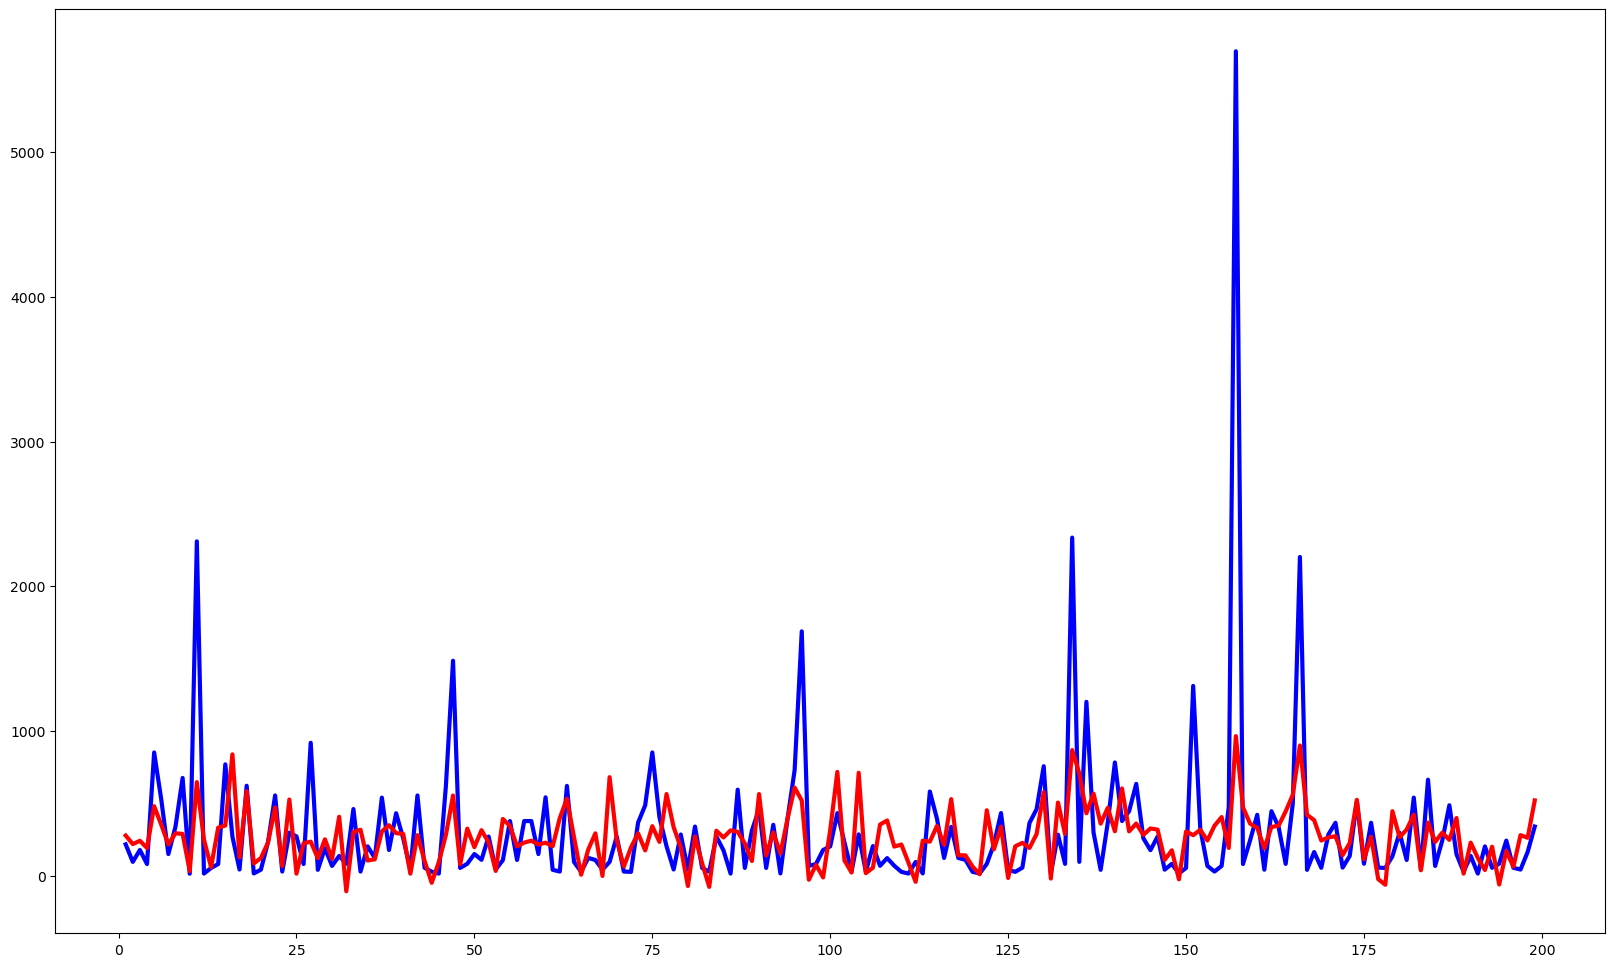

In [115]:
## Not a promising plot .. so let us plot actual and predicted.. Since there are many values let us look at 100 values

cnt=[i for i in range(1,200,1)]
plt.figure(figsize=(20, 12))
plt.plot(cnt,y_test[1:200],color="blue", linewidth=3,linestyle="-")  #Actual
plt.plot(cnt,y_pred[1:200],color="red", linewidth=3,linestyle="-")   #predicted
plt.show()

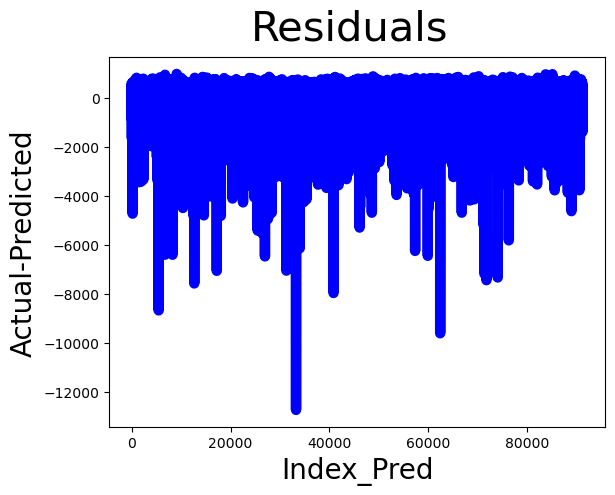

In [116]:
## Plotting the residuals 30% of 21613=6483.9 but take 6485 since dimension vary
cnt = [i for i in range(1, len(y_pred) + 1)]
fig=plt.figure()
plt.plot(cnt,y_pred-y_test, color = 'blue', linewidth = 7.5, linestyle = '-')
fig.suptitle('Residuals',fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual-Predicted', fontsize = 20)
plt.show()

Decision Tree Regressor

In [117]:
X_train.head()

checkout_price  category  cuisine  op_area  homepage_featured  \
141016          277.45         0        1      4.0                  0   
406574          414.25         6        2      3.8                  0   
189872          457.90         7        0      5.0                  0   
323934          411.28         1        1      4.0                  0   
142275          620.86        11        0      3.4                  0   

        base_price  meal_id  week  emailer_for_promotion  region_code  
141016      277.45     2139    48                      0           34  
406574      413.25     1216   130                      0           77  
189872      639.23     2581    64                      1           34  
323934      486.03     1770   105                      0           34  
142275      620.86     2867    48                      0           23

## Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)

In [119]:
## Evaluation of model using MAE/MAPE (mean of absolute error which is the difference between actual and predicted values)
## MSE (mean value of squared error), RMSE (interprets error in terms of Y)

from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_dtr = r2_score(y_test, y_pred)
print("R-squared DTR:", r2_dtr)

MAE 103.49590771364946
MSE 53629.99687024666
RMSE 231.58151236712885
R-squared DTR: 0.6478101077490422


## Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [122]:
reg_RF= RandomForestRegressor()

In [123]:
reg_RF.fit(X_train,y_train)
y_pred_rf = reg_RF.predict(X_test)

In [124]:
X_train.head()

checkout_price  category  cuisine  op_area  homepage_featured  \
141016          277.45         0        1      4.0                  0   
406574          414.25         6        2      3.8                  0   
189872          457.90         7        0      5.0                  0   
323934          411.28         1        1      4.0                  0   
142275          620.86        11        0      3.4                  0   

        base_price  meal_id  week  emailer_for_promotion  region_code  
141016      277.45     2139    48                      0           34  
406574      413.25     1216   130                      0           77  
189872      639.23     2581    64                      1           34  
323934      486.03     1770   105                      0           34  
142275      620.86     2867    48                      0           23

In [125]:
reg_RF.score(X_train,y_train)

0.9736450116832543

In [126]:
print('Mean Squared error             : {} ' .format(mean_squared_error(y_test,y_pred_rf)))
print('Mean absolute %  Squared error : {} ' .format(mean_absolute_percentage_error(y_test,y_pred_rf)))
print('Root Mean Squared error        : {} ' .format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print('r2 score                       : {} ' .format(r2_score(y_test,y_pred_rf)))

Mean Squared error             : 28480.706555041812 
Mean absolute %  Squared error : 0.5580776968883214 
Root Mean Squared error        : 168.76227823492374 
r2 score                       : 0.8129662957631796 


In [127]:
sns.set_style('darkgrid')

(10000.0, -10000.0)

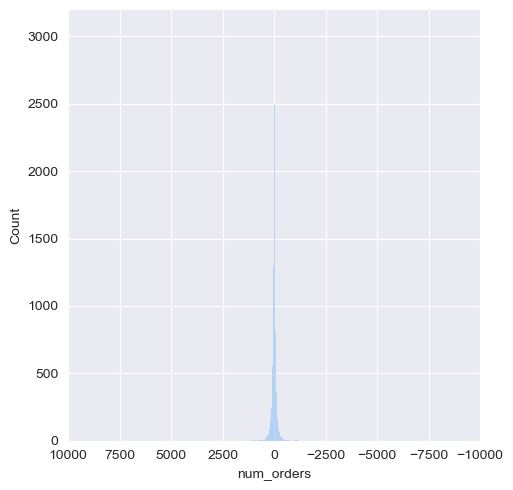

In [128]:
sns.displot(y_test-y_pred_rf)
plt.xlim(right=-10000,left=10000)

Text(0, 0.5, 'y_pred_rf')

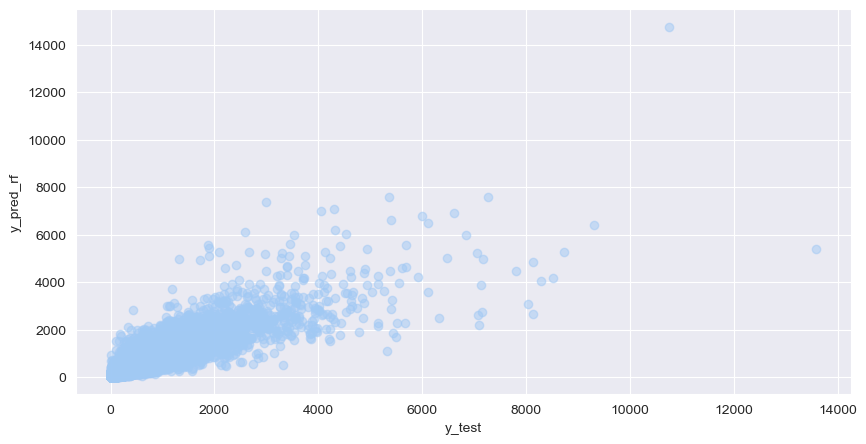

In [129]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred_rf,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred_rf')

In [130]:
food_train3.head()

checkout_price  category  cuisine  op_area  homepage_featured  base_price  \
0          136.83         0        3      2.0                  0      152.29   
1          136.83         0        3      2.0                  0      135.83   
2          134.86         0        3      2.0                  0      135.86   
3          339.50         0        1      2.0                  0      437.53   
4          243.50         0        1      2.0                  0      242.50   

   meal_id  week  emailer_for_promotion  region_code  num_orders  
0     1885     1                      0           56         177  
1     1993     1                      0           56         270  
2     2539     1                      0           56         189  
3     2139     1                      0           56          54  
4     2631     1                      0           56          40

In [131]:
food_train3.columns

Index(['checkout_price', 'category', 'cuisine', 'op_area', 'homepage_featured',
       'base_price', 'meal_id', 'week', 'emailer_for_promotion', 'region_code',
       'num_orders'],
      dtype='object')

In [132]:
food_test1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  category  cuisine  city_code  \
0                      0                  0         0        3        647   
1                      0                  0         0        3        647   
2                      0                  0         0        3        647   
3                      0                  0         0        1        647   
4                      0                  0         0        1        647   

   region_code  center_type  op_area  
0           56            2      2.0  
1           56            2      2.0  
2           56            2      2.0  
3           56            2      2.0  
4           56            2      2.0

In [140]:
columns = X_train.columns
columns

Index(['checkout_price', 'category', 'cuisine', 'op_area', 'homepage_featured',
       'base_price', 'meal_id', 'week', 'emailer_for_promotion',
       'region_code'],
      dtype='object')

In [141]:
food_test3 = food_test1[columns]
food_test3.head()

checkout_price  category  cuisine  op_area  homepage_featured  base_price  \
0          158.11         0        3      2.0                  0      159.11   
1          160.11         0        3      2.0                  0      159.11   
2          157.14         0        3      2.0                  0      159.14   
3          162.02         0        1      2.0                  0      162.02   
4          163.93         0        1      2.0                  0      163.93   

   meal_id  week  emailer_for_promotion  region_code  
0     1885   146                      0           56  
1     1993   146                      0           56  
2     2539   146                      0           56  
3     2631   146                      0           56  
4     1248   146                      0           56

In [142]:
X_train.head()

checkout_price  category  cuisine  op_area  homepage_featured  \
141016          277.45         0        1      4.0                  0   
406574          414.25         6        2      3.8                  0   
189872          457.90         7        0      5.0                  0   
323934          411.28         1        1      4.0                  0   
142275          620.86        11        0      3.4                  0   

        base_price  meal_id  week  emailer_for_promotion  region_code  
141016      277.45     2139    48                      0           34  
406574      413.25     1216   130                      0           77  
189872      639.23     2581    64                      1           34  
323934      486.03     1770   105                      0           34  
142275      620.86     2867    48                      0           23

In [143]:
X_train.columns

Index(['checkout_price', 'category', 'cuisine', 'op_area', 'homepage_featured',
       'base_price', 'meal_id', 'week', 'emailer_for_promotion',
       'region_code'],
      dtype='object')

In [144]:
food_train3.head()

checkout_price  category  cuisine  op_area  homepage_featured  base_price  \
0          136.83         0        3      2.0                  0      152.29   
1          136.83         0        3      2.0                  0      135.83   
2          134.86         0        3      2.0                  0      135.86   
3          339.50         0        1      2.0                  0      437.53   
4          243.50         0        1      2.0                  0      242.50   

   meal_id  week  emailer_for_promotion  region_code  num_orders  
0     1885     1                      0           56         177  
1     1993     1                      0           56         270  
2     2539     1                      0           56         189  
3     2139     1                      0           56          54  
4     2631     1                      0           56          40

Lets make Prediction using above models

In [145]:
pred_food_test= lrm.predict(food_test3)
pred_food_test[pred_food_test<0] = 0
submit_lrm_ETR = pd.DataFrame({
    'id' :food_test1['id'],
    'num_orders' : pred_food_test
})
submit_lrm_ETR.head()

id  num_orders
0  1028232  111.578890
1  1127204  110.654896
2  1212707  111.997742
3  1082698  242.917695
4  1400926  240.722655

In [146]:
submit_lrm_ETR.to_csv('FOF_LR_ETR.csv', index=False)

In [147]:
pred_food_test= DTR.predict(food_test3)
pred_food_test[pred_food_test<0] = 0
submit_DTR_ETR = pd.DataFrame({
    'id' :food_test1['id'],
    'num_orders' : pred_food_test
})
submit_DTR_ETR.head()

id  num_orders
0  1028232       121.0
1  1127204        54.0
2  1212707       135.0
3  1082698        96.0
4  1400926        67.0

In [148]:
submit_DTR_ETR.to_csv('FOF_DTR_ETR.csv', index=False)

In [149]:
pred_food_test= reg_RF.predict(food_test3)
pred_food_test[pred_food_test<0] = 0
submit_RF_ETR = pd.DataFrame({
    'id' :food_test1['id'],
    'num_orders' : pred_food_test
})
submit_RF_ETR.head()

id  num_orders
0  1028232      105.27
1  1127204      114.57
2  1212707      156.40
3  1082698       72.47
4  1400926       65.20

In [150]:
submit_RF_ETR.to_csv('FOF_RF_ETR.csv', index=False)

Based on these metrics, we can draw the following conclusions:

The Random Forest model outperforms both Linear Regression and Decision Tree Regression in terms of R-squared, MAE, MSE, and RMSE. It has the highest R^2 value, the lowest MAE, MSE, and RMSE, indicating that it provides the best overall fit and predictive performance among the three models.

Decision Tree Regression performs better than Linear Regression in all metrics, with a significantly higher R^2 and lower MAE, MSE, and RMSE. It is a better choice than Linear Regression for our dataset.

Linear Regression has the lowest R^2 and the highest MAE, MSE, and RMSE among the three models, indicating that it is the least suitable for our dataset.

Therefore, based on the evaluation metrics provided, the Random Forest Regression model appears to be the best model for our dataset, followed by Decision Tree Regression. Linear Regression is the least suitable model in this context.